<a href="https://colab.research.google.com/github/SaketKulkarni35/Swing-State-Twitter-Sentiment-Analysis-2020-Presidential-Election/blob/main/Data_Bootcamp_Final_Project%3A%202020%20Election%20Twitter%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Tweets from Users Living in Swing States

### Saket Kulkarni and Andrew Kim

The 2020 election is behind us. Biden won and denied Trump a second term in the Oval Office. There were a couple states that were "Swing States". Swing states are states that either side has a reasonable chance of winning. It's always a close race in these states and the outcomes are unpredictable. Is there any way to predict the chance of a candidate winning in these states? What we have done in this project is perform a sentiment analysis on tweets about the incumbent Donald Trump from users in these swing states to see if there is a possible relationship between the sentiments about Trump and the results of the election. We chose 9 swing states:
- Georgia
- Florida
- Michigan
- Nevada
- Pennsylvannia
- New Hampshire
- North Carolina
- Wisconsin

By analyzing the relationship between the sentiments and the outcome, we are attempting to see if it is a good predictor for the outcome of an election.

The goal of the analysis is to see if sentiment analysis on twitter is a good predictor for predicting the outcome of votes in a swing state.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('seaborn')

# The Data

Here is the whole, uncleaned dataframe. It has 13 columns and 1,842,555 rows of data. There are tweets from people all over the world. It is not yet ready to be analyzed because we need to first identify tweets from users in the swing states. Let's drop all of the null data.

In [ ]:
df = pd.read_csv('./247500_totaloutput_9parts.csv')
df

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,1,2,5,6,7,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
0,PrimalPolitical,"Post-Liberal, Pro-Brexit, Primitive",NaN,1060.0,7332.0,7483,2020-01-03 14:26:06,2020-11-04 10:36:54,0.0,0,"Righ now I'd say Trump is better positioned, j...",Twitter for Android,[]
1,lukejohnpearce,NaN,NaN,27.0,62.0,40,2017-07-12 03:35:23,2020-11-04 10:36:53,0.0,0,trump after pretending he cares about the work...,Twitter for iPhone,"[{'text': 'Elections2020', 'indices': [67, 81]}]"
2,TheTylerWest,@Twitch Partner,NaN,1020.0,2786.0,21118,2011-04-03 15:58:18,2020-11-04 10:36:53,0.0,0,@MarkSDeRosa @jkauffman23 @_waleedshahid @AJen...,Twitter for Android,[]
3,FionnaYvette,Fia. 31. #Arianator #LoveYou3000 #BookWorm #A...,"Sydney, Australia",3443.0,1231.0,77564,2009-04-24 15:47:21,2020-11-04 10:36:53,0.0,0,@denzelcanvas @JackieWarner13 Still better tha...,Twitter for iPhone,[]
4,tonyparas1,live your life and forget your age - norman vi...,"Castro Valley, Ca",696.0,26.0,2167,2011-08-28 01:39:49,2020-11-04 10:36:53,0.0,0,@kaitlancollins Am I wrong to say the resident...,Twitter Web App,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842550,gbacolor1981,TF am I supposed to do with this? Eh I’ll put ...,NaN,897.0,271.0,8761,2017-06-12 23:47:33,2020-11-07 10:36:18,0.0,0,@realDonaldTrump Bored now.. bye!,Twitter for iPhone,[]
1842551,dev_discourse,Devdiscourse: World's leading Website for Inte...,National Capital Region,690.0,84253.0,484961,2017-12-05 08:31:31,2020-11-07 10:36:18,1.0,0,"Trump, GOP test out rallying cry: Count the 'l...",Devdiscourse News Desk,[]
1842552,indelible_human,Plugging Human Intelligence in AI | Fitness fr...,NaN,4140.0,4126.0,13579,2009-05-13 09:37:14,2020-11-07 10:36:18,0.0,0,Still winning @realDonaldTrump ? https://t.co/...,Twitter for Android,[]
1842553,1stacyphillips,"🇺🇸🇺🇸🇺🇸Verified Independent ""Fact-Checker"" Fact...",United States,775.0,140.0,1844,2020-09-21 06:08:04,2020-11-07 10:36:18,0.0,0,When will she be elected for treason?\nhttps:/...,Twitter Web App,[]


### We will plot followers vs retweet count to see if the number of followers impacts the reach of a tweet and whether the relationship between the two should be analyzed in further analysis.

Text(0, 0.5, 'Retweet Count')

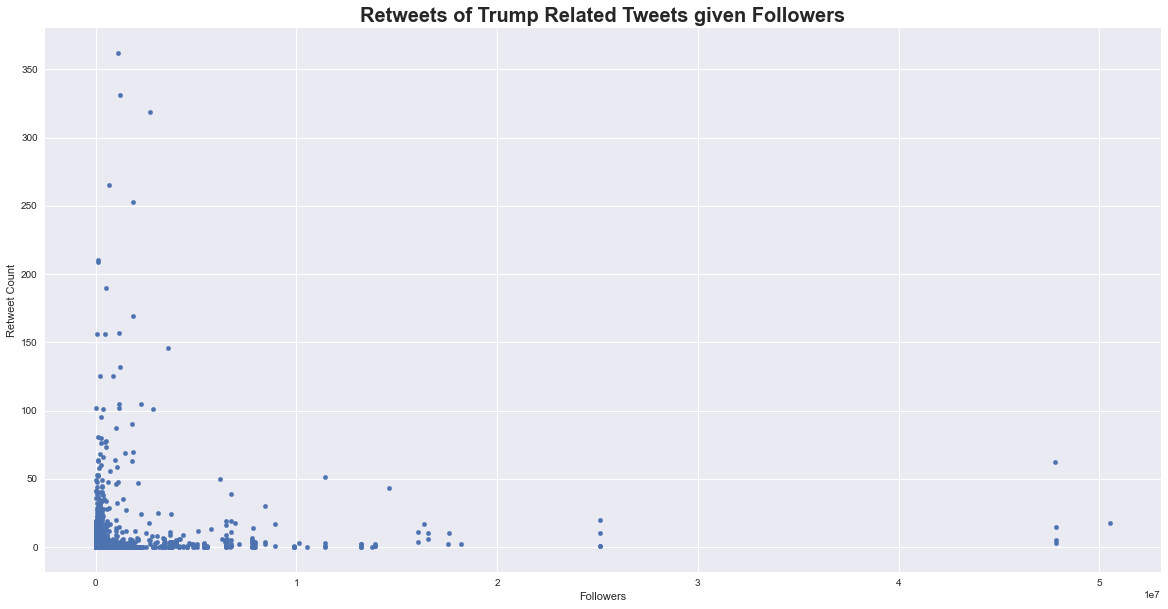

In [ ]:
fig, ax = plt.subplots()
df.plot.scatter(ax=ax, x='followers',y='retweetcount', figsize=(20,10))
ax.set_title('Retweets of Trump Related Tweets given Followers', fontsize=20, fontweight='bold')
ax.set_xlabel('Followers')
ax.set_ylabel('Retweet Count')


### It does not seem that having more followers has a relationship with the number of retweets when tweeting about Trump as we see that often the tweets with highest number of retweets do not have the most followers. 

Having looked at the dataframe as a whole, for this analysis we aren't interested in everything in the dataframe.What is of interest to us is the "location" column and the "text" column. We need the location to filter out the users in the dataframe that are in the swing states and the text because this is the user tweet we are going to use for the sentiment analysis. We're going to filter rows of data for users in the swing states. Let's take a look at the first 40 rows of location data first.

In [ ]:
df['location'].head(40)

0                          NaN
1                          NaN
2                          NaN
3            Sydney, Australia
4            Castro Valley, Ca
5                          NaN
6                      Oregon 
7                   Eugene, OR
8                  HOVE Sussex
9                          NaN
10                Florida, USA
11                         NaN
12             East Coast, USA
13         Orpington, Kent, UK
14                  Upstate NY
15                         NaN
16               Baltimore, MD
17                     Penang 
18                         NaN
19                         NaN
20                         NaN
21                     Glasgow
22              Gurgaon, India
23        Newfoundland, Canada
24                   Lewes, DE
25    Perth, Western Australia
26                         NaN
27       North Carolina (soon)
28                Higher Level
29                 భారతదేశం 🇮🇳
30                   Albany NY
31                   RETAILAND
32      

Just a quick glance shows us that the location data is very messy. Twitter's location description is unformatted. This means users are allowed to type whatever they please as their location description. Accordingly, we're going to have a variety of different location values. Some users typed the location in standard format that we're accustomed to (i.e.) Baltimore, MD). However, there are some that aren't real locations ( im a tranny🤪) and sometimes it's not even text at all (🔥🌎🔥) and so we're going to have to clean the data to include only locations presented in standard format. We also want to check for repeat values by comparing the nunique values of locations and the total row of data. If they are not the same, that means we have repeat values.

In [ ]:
df['location'].nunique(dropna=True)

53875

We can see that the number of unique values is equal to 53876 compared to the almost 2 millions rows of data. It's clear we're going to see some repeat values.

First, we save the unique values of the location into a list. This cleans out any overlapping locations there may be, which is very possible considering some people may have put their location in the standard format. Let's also make sure all of the values go in as string objects so as to make them easier to filter.

In [ ]:
df['location'] = df['location'].values.astype(str)
all_locations = df['location'].unique()

for location in all_locations:
    print(location)

nan
Sydney, Australia
Castro Valley, Ca
Oregon 
Eugene, OR
HOVE Sussex
Florida, USA
East Coast, USA
Orpington, Kent, UK
Upstate NY
Baltimore, MD
Penang 
Glasgow
Gurgaon, India
Newfoundland, Canada
Lewes, DE
Perth, Western Australia
North Carolina (soon)
Higher Level
భారతదేశం 🇮🇳
Albany NY
RETAILAND
New York, NY
İstanbul, Türkiye
im a tranny🤪
Kwetu
🔥🌎🔥
Bulldog Country
Wisconsin USA
los angeles
England, United Kingdom
Abuja, Nigeria
ranked competitive sex player
Saline, Dunfermline, Scotland
London, England 
Pate (Lamu archipelago),Kenya.
UK
Pocasset, MA
Bayelsa, Nigeria
Northern Ireland, United Kingdom
Jacksonville, FL
Wales, United Kingdom
Total Drama Island
Crypto Realm
#PA13 #BidenHarris #DemCast
Port Harcourt, NG
Earth 
United Kingdom
Limavady, Northern Ireland
Greater Sudbury / Grand Sudbur
England
Dortmund
United States
Fullerton, CA
London, England
Medford, MA
Finland
Union County, Ohio
Sydney
With the punks in Praed St.
Cape Town mostly, sometimes Washington DC
Cork, Ireland
Sali

Missouri
canada
wokanda
NSW Australia
Northumberland
In your head.
Chromatica 
Fargo, ND
York, UK
Bogotá
Chizama’s Heart
 #Quasar #SoyMasillama  
Somewhere
larrie•multifandom•ot5|she/her
Concrete Jungle
The Hague, Netherlands
a tiny island in Lauwersmeer
Almost There
Queensland, Australia. Female.
                        🇩🇿
A Planet Floating In Space...
Österreich
Kristiansund, Norge
Puerto Rico, USA
Colorado
St. Louis, Missouri
Barnet, London
Brisbane, australia
Yorkshire and The Humber, Engl
East Nowra New South Wales
Rio de janeiro
Stockton-on-Tees, England
Mitakihara Town
埼玉  
the ends
Selangor, Malaysia
Mid Ohio Valley, USA
OT12 ! 🐱🕊🐸🦌🦉🦋
Rawalpindi, Pakistan
Location: Somewhere else
www.DJmixes.co/rebirph
Mpls mn.
TWITZERLAND
The other side of flat earth 
Not currently on a ship
All around the world
Covington, La.
群馬
Sydney 
Antuérpia, Bélgica
DMV
Amersfoort, The Netherlands
she/her 16
Cbus
Saint Lucia
Vonore, TN
malaysia-
Outdoors wandering around :) 
TamBRUHello
she/her | miley/

My Bedroom
glasgow, scotland
Northside, Lafayette
♐♉♒
Rip City, OR
billie&bp | s/h
North Syracuse, NY.  OHIO 
SP/Uptown With The Fam
302
Boston, Ma
Reading, UK (but prefer Javea)
Burning to death in Vegas 
Fl 💛
ÜT: 51.837727,-0.818649
England, Britain, Albaria
Hudson River Valley
ᴘꜱɴ: ʀᴇᴛᴀɪɴᴀʙʟᴇ
Left at Albuquerque
Wichita, KS
Iowa the most boring state
GLOBAL
swimming with mac.
North England
Burien, WA
Sydney, Utah Minnesota NewYork
Philadelphia, Pennsylvania
Manchester, England UK
wellsworth station
Philly ✈️ Las Vegas ✈️ ATL
Rainbow Lake
behind 
University of Cincinnati
18| she/her| multi
Straya
The Parthenon
in pain
Zomba, Malawi
Helena, Montana, United States
South Park, Colorado
Philadelphia suburbs
Grand Marais, MN
my headspace 
Thighland
South of the Red River
this night
Ashburn, VA
Lancaster, PA
CdelU - Entre Rios - Argentina
Roswell, NM
Hellas
The Man On The Moon 👽🌙
Orange Park, FL
Movement is Life...
London & elsewhere 
tennessee
atl
Middlebury, IN
23.03.13 | 01.06.13 | 16.1

I live here || he/him
☝️ إِنْ شَاءَ أليس
nj 
Alagoas, Brazil
a dark pit of sarcasm
Mars  
Adamstown, Maryland
she/her // hellas 
The Failed State of America
precious ♡
Perryland
caroline du sud 
Hollywood,Fl
K’jipuktuk/Halifax
she/her | multifandom
Luxemburg 
N 33°56' 0'' / W 117°23' 0''
on a flight to outta space.
Lost in the World
Laascaanood, Somalia
¹ᴰ
Hogwarts on Thames
Live in Virginia
#BlackLivesMatter
ca/tx
Sad
ÜT: 40.763179,-73.962612
𓂀𓂀𓂀
Hellinois
Lagos - Monte Carlo 
she/her 20
Russia, USA, UK
she/her | 18 | sowk ♡
TC Valley, KY aka Safe Haven
Edge of Nowhere
Tealand
Wakefield, West Yorkshire
Newton Falls, OH
Fort Campbell North, KY
Arkham
Rancho Cucamonga, CA
she/her, 15 | 🇬🇧
near London
Van Nuys
she/they 17 
Columbus, MS
In Blue State Hell
Simping for MHA boys 💖 
A hole in a tree
Faroe Islands
Scottsdale / Detroit
S.AFRICA
Down East
NY 16 
614
Long Island, until the vaccine
Rentfree
Kaijou High
Heers - Horpmaal
Revolting against government
Westbury, NY
Cape Girardeau, MO
R

ST PAULI
The X Files Basement
Dortmund, Deutschland
discovery island, dak 
South side Dublin, Ireland
1060 West Addison, 60613
bed
Auckland
This Place called Earth 
P town represent
In your head clearly. 
US, Canada & Around the globe
she/her | minor 
In my lane📍
Hopeworld (she/her)
she/her | 17 | poc
moonlight bae/🇲🇽
Malmö, Sverige
West MI
Enköping
Orange county
larrie | she/her 
21 // egyptian
BidenHarris2020
Wisconsin Rapids, WI
Scattered like my soul
Edinburgh, Scotland. 
Made in Heaven. 
Konoha, Shin Sekai
Mom’s Basement, #DirtyJersey
Exeter
West Des Moines, IA
Back to home town in WA 
Midwest.
Taco Bell
87%  je suis Charlie, justice #noafd #TheResistance
Starksboro, Vermont
〽️emphis 
956
la city girl
BRONX
Texas Baby
Newark, notts
everywhere • she/her
Riddim Church
#Oklahoma Red State
Portland, Oregon, USA
5003’, CO, USA
United States & United Kingdom
Thibodaux, LA
Spruce Pine, NC
mpls, mn
The Beautiful Niagara Region
L.A./AZ native in Milwaukee
PHL, 215
Unbotherd🧘🏽‍♀️
Upstairs a

United States ~ DEMOCRAT
Trelleborg, Sverige
Los Angeles CA
gainesville | @retiredhaley
Bizarro World
Penn State University
she/her♡︎minor♡︎bi
Turlock, CA
Attiki, Greece
Wohltorf / Hamb.
Manchester U.K
Engaged to Panda
neston wirral
Searching...
Somewhere in the world
kurtistown
SCOTLAND
Giebelstadt
Center Valley, PA
Pocono Summit, PA. 
Moss Bluff, LA
Pacific Ocean
Anchorage, Alaska
North Wales 
emma♡
buffalo ny
The Bay/510
Central Coast
riverview nb
Earth, Milky Way
jadc@protonmail.ch
Quad Cities
presdient
Ice Planet Hoth
📍Charlotte NC
The Crow Club
Laguna Niguel, California
W rickyrefe❣️
Unfortunately Not Stars Hollow
Skyport de la Rosa
Republic of Azania 🇿🇦
ÜT: 37.127977,-121.973488
Southern New Jersey, USA
Deep in the heart of Jersey
The Internet or Perfidious Albion
Pacoima, Los Angeles
Saint john NB canada
Washington, PA
US and abroad
portage, in
Grand Island NY
the frozen banana stand
LI , NY
181013~190607~190608✨
-33.873567,151.196259
New Jersey, US
Ireland and Italy
Roblox: Pe

Canóvanas, Puerto Rico
NORTH
West (By GOD) Virginia
St.Louis / New York City 
Cuz wtf
Los Angeles / San Diego, CA
Charlotte Area, NC
ÜT: 33.828056,-117.906677
in cognito
Northfield, NJ
L.A.
Reincarnated in another world
Da souf
Edgewood, MD
ÜT: 47.597083,-52.71019
ur mom haha get pranked 
Columbus, Ohio 🌏
Northern SFV, Los Angeles, CA
Mesquite, TX
Morningside Heights, Manhattan
Causing Ruckus Uninvited
“Far out in the uncharted backwaters of the unfashionable end of the western spiral arm
faire isle • ot9
In pain
OC, California
straight,catholic,musician
NOVA
Twin World
Fairfield Glade, TN
♡♡jc ♡♡
ʎɔɐɯǝɹdns ɹǝuǝʇǝǝʍs
North Richland Hills, TX
Tulsa Oklahoma 
Count Every Vote, Los Angeles
Tilburg
Orpington
On the river
she/her, 24, ACAB. BLM. ✿
BOS I BK I CMH
Martin, Tennessee
Satan’s Bath Water
A rubble strewn bunker
Planet Drool 🇺🇸/🇧🇷
LA | HTX
Uptown Charlotte
16 ⚢ ✿ she/they
 ✧*̣̩⋆̩☽⋆゜뭔가 달라질까 그런 건 아닐 거야 그래도 이 하루가 끝나잖아 초침과 분침이 겹칠 때 세상은 아주 잠깐 숨을 참아 Zero o'clock
Cashapp: $superajules
Mon

India ✨
Salt Lake City 
Erwin, TN
edgelord wannabe
Obssesed with Me💕I dont mind
Shreve, Ohio
Getting the Two Ghosts MV
Sylvan Lake Alberta
Mesa, az
Reidsville, NC
Plizzanet Earth
Wanderlust
Woodinville  WA
Knowsley.
LaLa..oh stfu
The Higher Plane
Florida, USA CD 20 🇺🇲⛵🍊
MBNR/hyderabad, Michigan,USA
616
Woodside, NY
Sylva, NC
pretty good thanks
Stay classy 💙
she/her | 21 | m/4
Cory Booker’s Suburbia
Málaga, Santander
she/her; 20
Valencia Ca
Brownsburg, IN
Birmingham 
karnataka 
Central Maine
Under the Milky Way
Sacramento State
QUARANTINE
New Castle, DE
Arlington, VA and Jupiter, FL
she/her • ny 
Some People eh?   Parler
he/him | colorado ⛰️
The City of Angels
Multiverse
#fightingthegoodfight
she / them // 18+
soñando
Kuala Lumpur, Wilayah Persekut
hills of indian
Reichshof, Deutschland
Anywhere you want =)
Yucaipa, CA
Marmora, NJ
Metro DC
Sabby tx
baltimore, maryland
Houston TX,
Glenview, IL
방탄소년단
beach, mountain everywhere
Introvert Heaven
On Stage Somewhere
South East USA
Inside life

Nr Durham, UK
Miami, Cleveland, LA
Popocatépetl
rynndraws@outlook.com
hinter mir
Greggs 
To the world
Hiding from Rona
right now right here
Erf 
Parler: @Trumpski
Gverse
Nainital
Secunda, South Africa
Dim town, Darkness
Tacoma, WA, San Francisco, CA
BLUE STATE
akaia
Warrensburg Missouri
Check Socials 👉
Buckinghamshire, UK
اپنی اوقات میں رہتا ہوں۔ 
California&  भारत
Nixonland
Monroe, MI
18 | ex-morbidly obese | she
South Lyon, Mi
Mbeya
 Islamabad  Jammu And Kashmir
COYS
Portsmouth, NH
sc: jasiemoniquee
Canada, of course
Stinson Beach
Marin County, California 94957
Oz (godzone)
North Yorkshire, England
Somewhere in WV
Saudi Arabia
Deep State, CA
Bağcılar
where ever the squirrels are
Wahiawa, HI
Noongar~Whadjuk country; WA
Los Angeles/London/Liverpool
Zambia, central africa
Doug Collins is a fake pastor
من این ویران سرا را دوست دارم
Seattle Space Mountain
Kaduna/Warri/Sokoto, Nigeria
she/her, 13
Coast/Interior Salish Land, BC
Eastern, Kenha
Shining City on THE Hill
West Valley, CA 
Essex/

Land of the Rising Sun ☀
Fort Myers, Florida
SE MINNESOTA USA
Brookhaven, GA
Washington... the State.  
Chelsea
Mississauga, ON, Canada
Bay City,  Michigan
Somewhere in Texas #BLM
17   she / her
Quincy MA
CLT 
The DC/MD/VA area (DMV)
Rhondda Cynon Taff
Down the Shore
Karachi by the Shadow
Bochum, Deutschland
Haldimand Proclamation
From Trier Germany
NoWhere
BURBUJA
Ocklawaha, FL in the Ocala National Forest 🐈🐻🦉🐜🕷🐢🐍🦎🐊🌲🐸
Big hit Entertainment
fluker Louisiana 
OBX
 Wonderland
Westworld
Cambridge. Bleed Blue.
Somerset uk 
Silicon Valley native, lives on Maui
wakefield, rhode island
Out beyond the ideas of wrong 
New York (where else)?
Connecticut USA
Burj Al Khalifa
 Magallanes, Antártica Chilena
DELAWARE! 
Dayton, OH (Centerville burbs)
huntsville 2:56
Sydney,Australia
Philly suburbs & Wash., DC
Deket colokan, Indonesia
Blocked list
Satan's BDSM Lair
MULTI ! MINOR 
Shaft city
Wherever I ride a motorcycle
North Georgia 
L☹︎VE
On the run
Florida (Sadly)
Monroe, Ohio
Kipawa, Québec Canada
T

Bondi Beach, Sydney
At Moe's Tavern
Los Angeles #DTLA
%HOMEDIR%
Toronto, Tamworth & Torino
Milngavie
Slaying albino alligators
In your head, rent free
HI 🏝 ➡️ LV 🌵➡️ LA 🎥
From the BAY to LA.
NSW Bush and into Infinity
seattle, wa║⚣
Hong Kong & USA
Lages, Brasil
Nottingham and online @
Works from home
FL/TX
Here and there and everywhere
ÜT: 53.522345,-113.583108
Thotville, USA 
in elliot’s arms (: 
Near Springfield, Missouri
Zhigaagoong
2989 sycamore street 
Corning NY
Free Reign
Heinkenszand, Borsele
$KimberlyHavoc
Saint-Germain-des-Prés, Paris
jaan ke kyaa kroge
Dyker Heights, Brooklyn
Omnipresent. 
Houston via Seattle via Dixie
Guess 
Tofino 
bi || minor 
Chaos Dimension
The Virginia Mountains 
Walton, Liverpool, England
CO USA
they/them • 29
Nonya Bidness
Views are my own.
100 Mile House, BC
The Gamer Zone 😎
De Yawngs
yikes
SF, The Golden State
Outskirts, Virgo Supercluster
Minas Gerais
Tarp House
she/her, 19 💜
chez moi
Hamburg, Germany 
Shrewsbury & Bristol
Landsberg am Lech, Deuts

Geddington, UK
Alaska!
Peak District, UK ex Liverpool
956 
Nynäshamn  Sweden
Maas-Schwalm-Nette
CHICAGO,IL
Tampere
3 weeks late with Starbucks
Graceville QLD
Givin' out hugs somewhere
London & Paris
Downtown "Cools-Ville"
In your ❤️
Ribble Valley, Lancashire
Paris und umzu
Spread Love
Farnham, Surrey
London/Newcastle
Republican Hell, CT
Connecticut - U.S.A.
Chi Town
South east
gfrdstay (back up)
Dans mon potager. 
Cartagena. Murcia. España
Gedney Drove End, England
he/him/that n*gga
Central France
New York #GoodTrouble
Well see
The Middle of Wisconsin 🧀
USA EARTH
Kingaroy, qld.
Southeast Pennsylvania
Carlsbad
pfp by @frostiios
Landlocked
Omaha, Nairobi, Heaven
Barjarg
she/her BLM
Humboldt Co
amsterdam, netherlands
Upper Arlington, Ohio
لڤاطة
planet z
Wollongong Australia
E S S E X 
Lubumbashi, DRC 
living at the edge of the worl
Planet Earth...sigh
Saint Combs, Scotland
London, Zurich
Duesseldorf 
planet Earth
Behind ya. lol
Film Editor | Los Angeles
Portland OR / Los Angeles CA
Clarks

Now with this list, we are going to have to filter out the locations that are part of the 9 swing states mentioned before. Because the data is unformatted, there's no way to get every single user in the dataframe located in the swing states. As mentioned before, some people may not have disclosed their location or some may have used descriptions representative of a state without directly mentioning the name of the state. So for this analysis, we decided to filter out the location by including those locations that have the state name or state abbreviation in the location.

## Georgia

To filter out the locations that are in Georgia, we used two conditions:

1. All locations that have 'georgia' in it
2. All locations that have GA in it

Then we placed these locations inside a new variable georgia_list.


In [ ]:
georgia_list = []

for location in all_locations:
    if ('georgia' in location.lower()) or ('GA' in location):
        georgia_list.append(location)
        
georgia_list

['Georgia',
 'Atlanta, GA',
 'streets of MAGAdelphia ',
 'Warner Robins, GA',
 'Cumming, GA',
 '#MAGA#Build Wall#Vote4y/Wallet',
 'College Park, GA',
 '⏺MÁLAGA CF⏺',
 'GABORONE',
 'Macon, GA',
 'Georgia, USA',
 'GURGAON',
 'Statesboro, GA',
 'USA-Georgia',
 'Roswell, GA',
 'Atlanta, Georgia',
 'Centerville, GA',
 'Columbus, GA(Opelika, AL)',
 'Georgia. ',
 'Atlanta, GA (via Boston, MA)',
 'Douglas, GA',
 'Richmond Hill, GA',
 'ONTARIO LOMA LINDA RIVERSIDE REDLANDS PALM SPRINGS RANCHO CUCAMONGA, CALIFORNIA',
 'atlanta georgia',
 'Milan,  GA',
 'Augusta, GA',
 'Atlanta, Georgia, USA',
 'ATLANTA GA',
 "MICHIGAN let's remove Witchmer",
 'Florida & Georgia',
 'Swainsboro, GA',
 'Warner Robins GA',
 'Hoschton, GA',
 'Atlanta,Georgia ',
 '#MBGA #MUKGA',
 'GA',
 'Georgia,USA',
 'MICHIGAN, USA',
 'georgia',
 'Ellenwood, GA',
 'Calhoun, GA',
 'Athens, GA',
 'Statesboro, Georgia',
 'Temple, GA',
 'N. Georgia USA',
 'Griffin, GA',
 'Savannah, GA',
 'Kennesaw, GA',
 'Woodstock, GA',
 'South Georgia

At this stage, we come across another problem. Our condition includes  locations that may not be related to georgia, but have GA or georgia in it. 'MICHIGAN, USA', is not part of the state of Georgia, but because it has "GA" in it, it was included. Also, there are some location values where georgia is included but there are also other locations  such as 'GA/NJ/FL & CURACAO'included. There's no way to filter out location values that are exclusively Georgia because of the fear of leaving out important data. Accordingly, we decided to manually filter out the location values that we could conclude were not in Georgia. 

In [ ]:
unwanted_ga = ['streets of MAGAdelphia ','#MAGA#Build Wall#Vote4y/Wallet', '⏺MÁLAGA CF⏺','GABORONE','GURGAON','ONTARIO LOMA LINDA RIVERSIDE REDLANDS PALM SPRINGS RANCHO CUCAMONGA, CALIFORNIA',
              "MICHIGAN let's remove Witchmer",'Florida & Georgia', '#MBGA #MUKGA','MICHIGAN, USA','GAY OUTTA Wyoming, MI','Scotland, Britain. BREXIT MAGA',
              'GA✈️NC','GA ✈️ NC','GA - NY','MAGA Country','georgia / scotland','LAS VEGAS','INTERGALACTIC CITIZEN',
              'MA🌟GA🌟Country🇺🇸','MAGA Country, Michigan, USA',"Where MAGA's Aren't",'GA/NJ/FL & CURACAO','LAS VEGAS!','SE GA - Coastal Empire',
              '#KAG #MAGA California USA','D-2 TRACK 05 : 28. | # PROD. $UGA ᥫ᭡ ⠀ ⠀⠀⠀⠀ ','GA to DC ','#MAGA',
              'Atlanta, GA....Kolkata','📍SHE!HER | MINOR | NIGGA !!','JIHADI @GBENGA_ABOROWA TORMENT',"I block MAGAt's, bots +trolls.",
              'Atlanta, GA | LOS','Athens, GA/Metropolis, IL','Los Angeles via GA/KY',' #TCOT #MAGA #AmericaFirst','Atlanta, GA ✈️Lexington, KY',
              'In Michigan»MD.AZ.GA.','GA NYC TX CA','#MAGA Country','VEGAS','Georgia // Alabama','Atlanta, GA Brockton, MA',
              'the ATL GA SC','MAGA Country, Iowa','I AM A NIGGA','👶🏾BX🚈CT🛫VA🛫GA🛫TN✈️UK✈️IQ','MICHIGAN ','GA•MS','NYC/GA/TX/LA',
              'MAGA, NYC','GLO GANG MODE','Big bend Fla/ South Georgia','Georgia, USA and Michigan, USA','MAGA COUNTRY ','Fort Llatikcuf AZ. I shit MAGA-turds even more than Donut Twitter donut holes. #StillWithHer McKinney 08/Stein 12/Stein 16',
              'Started in GA-Live in Houston','OUT WORKING IN A GALAXY, FAR,FAR AWAY!','20! SHE/THEY! BLACK! GAY!','York PA (Trump MAGA Country)',
              'MAGA, USA','NC/Georgia','GA FL ','In Minecraft LEGALLY, N.N.Z.','Born GA. Raised AZ. Stuck TN','GAY gay🏳️\u200d🌈',
              'KOGA’S GUITAR OH MY GOD','House MAGA, USA','DURG CHHATTISGARH INDIA','GANGLITOJXY','from SF | currently in VEGAS',
              'BUSHWICK BROOKLYN NIGGA!','LURGAN,CO ARMAGH, IRELAND','Atlanta, GA/Highlands, NC','Atlanta, GA/Sebastian, FL',
              'wishing i was w georgia','SEGATRON HQ LOS ABV NGR UAE FR','Lived in ND•MN•TX•GA•CA•NV','WEST BENGAL,INDIA','Atlanta, GA via Baltimore, MD',
              'MAGA Land','CALL & GALVESTON, Texas','Family b4 Fuck NIGGAS','GANJAISTAN','Streets of MAGAdelphia ','GA born, proud MD resident now',
              'Slurping MAGA Tears','VEGAS ','SOARINGTHEGALAXY','Texas/Georgia','Cincinnati/Georgia','FtLaudFL•SavannahGA•KENTUCKY💙',
              "New York & Georgia Y'all ✈️",'Savannah, GA / Hilton Head, SC','MAGA','CO irl, DC/VA/GA on my mind','Montgomery, AL and Atlanta, GA',
              'MAGA, AMERICA','Philly / GA','NY, NJ, CT, GA, OH, CT, PA, VA','Japan/Georgia/Chi-Town','GALLIFREY ','NC/VA/OH/GA/NM/PA, USA',
              'Atlanta, GA|Charlotte, NC, USA',]

georgia_cleaned = [i for i in georgia_list if i not in unwanted_ga]
georgia_cleaned

['Georgia',
 'Atlanta, GA',
 'Warner Robins, GA',
 'Cumming, GA',
 'College Park, GA',
 'Macon, GA',
 'Georgia, USA',
 'Statesboro, GA',
 'USA-Georgia',
 'Roswell, GA',
 'Atlanta, Georgia',
 'Centerville, GA',
 'Columbus, GA(Opelika, AL)',
 'Georgia. ',
 'Atlanta, GA (via Boston, MA)',
 'Douglas, GA',
 'Richmond Hill, GA',
 'atlanta georgia',
 'Milan,  GA',
 'Augusta, GA',
 'Atlanta, Georgia, USA',
 'ATLANTA GA',
 'Swainsboro, GA',
 'Warner Robins GA',
 'Hoschton, GA',
 'Atlanta,Georgia ',
 'GA',
 'Georgia,USA',
 'georgia',
 'Ellenwood, GA',
 'Calhoun, GA',
 'Athens, GA',
 'Statesboro, Georgia',
 'Temple, GA',
 'N. Georgia USA',
 'Griffin, GA',
 'Savannah, GA',
 'Kennesaw, GA',
 'Woodstock, GA',
 'South Georgia',
 'Georgia, USA via Newcastle, UK',
 'AHN (Ben Epps), Georgia',
 'Snellville, GA',
 'ATL, GA / USA',
 'Marietta, GA',
 'Atlanta, GA ',
 'Chickamauga, GA',
 'Lithonia, GA',
 'Alpharetta, Georgia',
 'Rydal, Georgia',
 'Georgia ',
 'Marietta Georgia via NJ ',
 'Luagrange,GA',
 'Am

With this, we were able to get all the locations that we could conclude were in Georgia. Next we picked out all of the rows of data in our main dataframe, df, that correspond to these locations. We need to first create an empty dataset that is a copy of the main dataframe. This makes sure that we keep all of the columns and data structure of the main dataframe. Then we loop through all of the location values in the georgia_cleaned variable. We use this as the condition to locate all of the rows of data in the main dataframe that are twitter users in Georgia who tweeted about President Donald Trump.

In [ ]:
georgia_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in georgia_cleaned:
    a = df.loc[df['location']==location]
    georgia_df = georgia_df.append(a)
    
georgia_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
328,TGS_24,NaN,Georgia,197.0,199.0,2951,2014-06-08 04:28:38,2020-11-04 10:36:37,0.0,0,@NBAMemes You do know if Biden wins WI Trump s...,Twitter for iPhone,[]
393870,JV_Dzhuga,You cannot make a revolution with silk gloves....,Georgia,3329.0,3206.0,12672,2018-03-01 00:41:20,2020-11-04 11:10:49,0.0,0,@NstyWmnWendy @Theon_Orbis @realDonaldTrump Mr...,Twitter Web App,"[{'text': 'banktrumpt', 'indices': [48, 59]}]"
400654,JadRabit,"He/She | Parent, Spouse, Gamer, part-time Stre...",Georgia,411.0,179.0,4682,2010-08-19 20:56:43,2020-11-04 11:44:41,0.0,1,@Tomaltach777 Oh yeah. It's a total shitshow. ...,Twitter for Android,"[{'text': 'FuckTheUSA', 'indices': [198, 209]}]"
400985,maria_mu2,Business & Finance Government & Politics News,Georgia,388.0,374.0,12099,2016-12-30 00:33:06,2020-11-04 12:04:25,0.0,0,"@rdeane13 Agree 2016 outcome was late, but PA ...",Twitter for iPad,[]
406903,southpaw_GA,Trying to save our Republic and Planet from t...,Georgia,5072.0,4636.0,69003,2017-02-07 14:16:48,2020-11-04 12:41:04,0.0,0,I never imagined that there was this many hate...,Twitter for Android,"[{'text': 'GenZ', 'indices': [114, 119]}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194370,troymation,NaN,"Buford, GA",773.0,62.0,2800.0,2009-12-23 14:38:26,2020-11-07 09:44:22,0.0,0.0,The left: \n\n“Trump is illegitimate! Russia h...,Twitter for iPad,[]
1196841,JorgWashingMac7,President Failure makes me vomit. Imma go drin...,"🇺🇸Atlanta, Georgia🇺🇸",13.0,4.0,348.0,2020-07-30 18:36:34,2020-11-07 10:01:24,0.0,0.0,@HardscopingHo3 @CarltonWorthen @realDonaldTru...,Twitter Web App,[]
1197106,Joe4Dunwoody,"Council Member, City of Dunwoody GA. HCM Solut...","Dunwoody, Georgia USA",1418.0,678.0,3129.0,2008-12-22 18:32:32,2020-11-07 10:22:24,0.0,0.0,The current narrative from TrumpWorld on Trump...,Twitter for iPhone,[]
1712038,scottisatwork,goodbye. see you on parler.,"lockdown, GA",558.0,440.0,28561,2009-04-21 02:29:38,2020-11-07 10:37:13,0.0,0,.@realDonaldTrump \n\nDisgusting. Barr is usel...,Twitter for iPad,[]


Text(0, 0.5, 'Tweet Source')

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: 

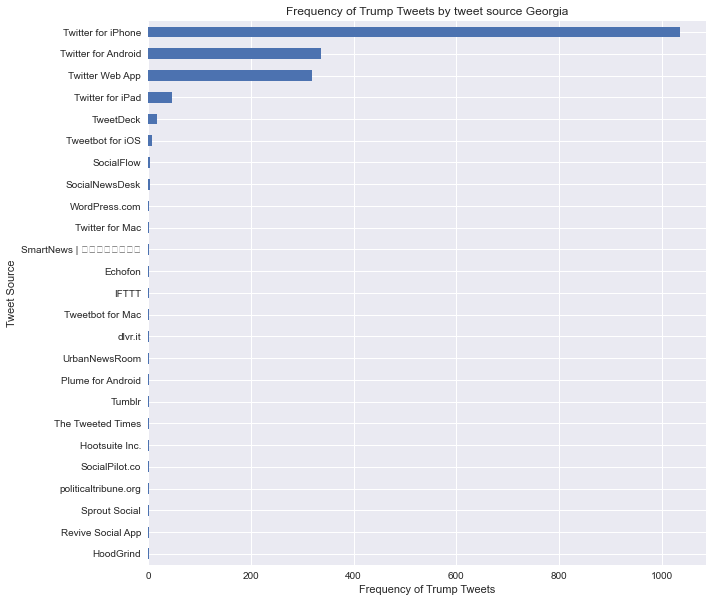

In [ ]:
georgia_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by tweet source Georgia')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

We have successfully created a dataframe filled with tweets from a sample of users in the state of GA that we can use as a representative for the population. We have also plotted the tweet sources of all the tweets in Georgia to gain a better understanding of how the tweeters in our data frame are interacting with the platform. This same process is used for the rest of the swing states. Here is the code used to get dataframes of all the different swings states.

## Florida

In [ ]:
florida_list = []


for location in all_locations:
    if ('florida' in location.lower()) or ('FL' in location):
        florida_list.append(location)
        

unwanted_florida = ['Florida, New York, MA, USA','FL-LA-TN ','LA but FL is home','TN | FL | DC','Florida & Georgia',
                   'OH, FL, NC, AZ, & now NorCal','Florida, Panama, Sicily','New York City; South Florida',
                   'FL - CT ','Orlando, FL & White Plains, NY','ATL ✈️ SF ✈️ LA ✈️  FL','Manitoba/Florida/Haiti',
                    'The Zero FL House','New York/Florida','KY - NYC - FL - DFW','📍L.E.X. KY🛸P.A.🚀FLAWDA',
                   'New York, Florida, Nevada','Phoenix, AZ (via RI, MD, FL)','Tampa, FL* * Buffalo, NY',
                   'Louisiana & Florida ','FL-MI-TX','FL$T8 ‘22','GA/NJ/FL & CURACAO','FL➕NY',' FL  ✈️ GA',
                   'Las Vegas / Florida / Detroit','Pacific NW, Prior: DC & FL','USA/Florida /Ohio','NJ/FL/CA',
                   'LAX ↔ JFK (on FLG sabbatical)','NJ FORMERLY FL','FL✈️MD ','Lewes, DE & Port St Lucie, FL',
                   'Weston, FL & Freehold, NJ','Born: FL Raised: NYC Life: CA','Macomb County, MI / FL Keys',
                   'Las Vegas/Florida, USA',"4's Up | FLA 🛩 KC",'FL & OH','Illinois & Florida, USA',
                   'FL, OK, NY, MD/DC','🌽IA.UK.CA.FL.SC.OR.🌲','Cleveland, OH & Miami, FL','FLAWDA ',
                   'NFL Headquarters','MI/WNC/FL ','Florida USA/LiverpoolUK','FL ✈️ VA✈️LA','Jamaica and Florida',
                   'Not in Florida','Cape Canaveral, FL/Seattle, WA','Florida and Chicago','Poughkeepsie, NY; Naples, FL',
                   'Paterson NJ OcalaFL NJ Woods  ','Chicago & South Florida.','Los Angeles/ Florida/ NC','TX/MD/DC/FL',
                   'FLG','Arlington, VA and Jupiter, FL','GA FL ','VB, FL','🌇NY↔️FL🌅','Atlanta, GA/Sebastian, FL',
                   '✨NEOhio ☃️✨SWFlorida🦩✨','FL,  PA, Africa','Vegas, Florida & West Virginia','USA-NY-CO-MA-FL',
                   'South Florida/California ','Stuart, FL/Pittsburgh','Florida, USA, Tenn, USA','Zephyrhills, FL & Waco, Texas',
                   'Florida and Europe ','Chepachet RI, The Villages, FL','Central FL and Western NC','not florida',
                   'TheMittenState/Nashville/NOLA/FL','Atlanta/Florida ', 'Maine/Florida','Dallas, TX via Pensacola, FL ',
                   'Washington, DC, Lantana, FL','Georgia by way of Tampa, FL','NY/FL','FtLaudFL•SavannahGA•KENTUCKY💙',
                   'FL/TX','Brooklyn, NY. Florida ','NJ, MA, CO, WY, CA, FL','Portland Oregon by way of FLA ','Florida,Caribbean, & Beyond',
                   'FL-DC','Los Angeles, CA / Miami, FL','Bronx, NY. FL, USA','London & FL #Lesbian #podcasts','Venice, FL and Appleton, WI',
                   'Indialantic, FL, Boulder, CO','Illinois. NM. NC. Mass. FLA','Florida/Finland']


florida_cleaned = [i for i in florida_list if i not in unwanted_florida]

florida_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in florida_cleaned:
    a = df.loc[df['location']==location]
    florida_df = florida_df.append(a)
    
florida_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
10,LeeKessler18,Mother of 4 legged 11 year old and a lover of ...,"Florida, USA",233.0,221.0,6011,2018-10-26 11:40:11,2020-11-04 10:36:53,0.0,0,@kylegriffin1 Somebody please explain to Trump...,Twitter Web App,[]
54,futzskull,MooGee with a hard G.\nI grow on people. A cur...,"Florida, USA",411.0,35.0,687,2020-10-16 20:33:20,2020-11-04 10:36:51,0.0,0,"AP didn't factor in 300,000 ballots sitting in...",Twitter for Android,"[{'text': 'MiamiDadeUSPS', 'indices': [51, 65]}]"
81,Angel1000prcenr,I'm an educator. I'm into animal rescue & help...,"Florida, USA",1035.0,216.0,45498,2016-07-27 15:53:27,2020-11-04 10:36:50,0.0,0,"Keep in mind, if trump loses, there is a way w...",Twitter for Android,[]
252,TamiOCo28767819,"Proud mom, wife, EWU alum, teacher, and USAF v...","Florida, USA",113.0,26.0,433,2019-07-17 19:36:11,2020-11-04 10:36:41,0.0,0,@joshgad Of course you would say that! It’s a ...,Twitter for iPhone,[]
623,AprylSoderlund,🇺🇸PROUD AMERICAN 4 TRUMP😇💜🇺🇸Widow Of a VietNam...,"Florida, USA",4981.0,4334.0,35357,2013-08-09 13:58:42,2020-11-04 10:36:21,0.0,1,Yes. Putting off the inevitable truth of Trump...,Twitter for Android,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198168,RobertW51496420,Just a chilled guy. I don't judge. Everything ...,"Seffner, FL",226.0,63.0,1856.0,2019-10-21 22:11:14,2020-11-07 10:20:47,0.0,1.0,@MollyJongFast @FauciFan See like I've been sa...,Twitter for Android,[]
1198571,dlm52929,NaN,Southwest FL,157.0,19.0,5464.0,2017-01-20 01:41:16,2020-11-07 10:20:07,0.0,0.0,@rooshv Lol. They think anyone cares about the...,Twitter for iPhone,[]
1580315,mrgoodbar404,(Visit our Network) https://t.co/biykbJg7sL,"florida,usa",4937.0,2238.0,15069,2013-05-11 19:54:59,2020-11-07 10:18:58,0.0,0,"Mark Meadows, Trump’s Chief of Staff, Has the ...",Twitter for Android,"[{'text': 'quality', 'indices': [111, 119]}, {..."
1580466,EdwardAshton30,🇺🇸 REBEL WITH A CAUSE 🇺🇸 LIFE IS A GIFT 🇺🇸 TO ...,PALM BEACH.FLORIDA USA,4923.0,31498.0,202004,2012-08-01 11:31:59,2020-11-07 10:40:14,0.0,0,"""BREAKING NEWS"" Leftists, Never Trumpers Begin...",Twitter for Android,[]


Text(0, 0.5, 'Tweet Source')

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: 

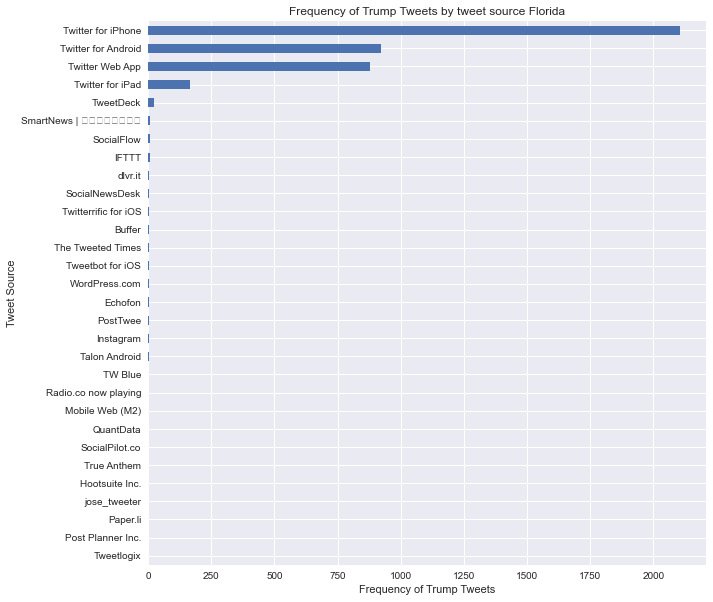

In [ ]:
florida_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by tweet source Florida')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## Michigan

In [ ]:
michigan_list = []


for location in all_locations:
    if ('michigan' in location.lower()) or ('MI' in location):
        michigan_list.append(location)


unwanted_michigan = ['Michigan or Wales','Southwest Florida Michigander','MIA✈️ATL✈️NYC✈️LAX✈️HOU','Michigan Fans LOSERS',
                    'GMT + 8 | MINOR!!','minding my bidness. MIND YOURS','Washington, DC via Michigan','Canada or Michigan most likely',
                    'she/her | bi | ! MINOR ! | blm','MI➡Cleveland, OH','Michigan, USA, Windsor, Canada','MILANO - PARIS - MOSCOW',
                    'MINNESQTA','MI-PA','SUBATOMIC ','MI ➡️ DE ','MN | MI | DC','Texas, MI','WHOLE LOTTA CHOPPA REMIX',
                    'Las Vegas, NV/ Michigan','The GREAT MIDWEST','SD | LA | PHX | LV | MIA','SMILE OUT NOW','MI & PA, USA',
                    'she/her | 22 |🔞 NO MINORS!! ','Wyandotte, MI ✈️ Savannah, GA','FL-MI-TX','from west MI. now WI on Lake M',
                    'STREAMING POV','LAN-MSP-MIA-ORD','Michigan/Indiana/Global','Chicago, IL Buchanan, MI','MIAMI','SHE / HER | MINOR',
                    'MI🚗OH','LIL MINOR LIKE IM UNDER 16','Not Michigan','Michigan, Arizona USA','A2 MI','they/her (?) || MINOR !!',
                    'MI & NY','MI ✈️ AZ ','📍SHE!HER | MINOR | NIGGA !!','Michigan City, IN','Washington, DC + Detroit, MI ',
                    'Macomb County, MI / FL Keys','California/Michigan','Chi via ATX via Hot Dog via MI','はるか遠い遠い昔 SHE / THEY / KLEE / KLEESELF 文豪ストレイドッグスハンター×ハンター, MINOR 怒らないで見捨てないでどこもいかないで EST 強く絞める吐くまで絞める人がいないいないといい成績でしょねえねえいい子でしかわいい子でしょねえねえ良い子でしょう苦しいねえ',
                    'MINOR ✮ ISTP ✮ GMT+3','MIAMI,FL ','In Michigan»MD.AZ.GA.','Michigan and Indiana','MINOR ✗ SHE!LOVE                         ⠀ ⠀⠀ ⠀                       見つめてる⠀⠀⠀ ⠀⠀⠀ ⠀ ⠀ ⠀⠀ ⠀⠀⠀ ⠀⠀⠀ ⠀⠀⠀ ⠀ ⠀ ⠀⠀             暗闇さえも so beautiful',
                    'MIT','STREAM SAVAGE REMIX 👇🏽🔥🐝','MINOR | she/her','Norman, OK & Ann Arbor, MI','CUMMIEFORNIA','MINOR💯 בסתי',
                    'Las Vegas, NV  BWO Detroit, MI','MINOR || THEY/THEM','From Michigan & Great Britian','GO BUY AGE OF CALAMITY ',
                    'MIAMI to ORL','Michigan, North Carolina, VA','Detroit, MI ➡️ Lexington, KY','MINOR','WEST HEMI','MI/WNC/FL ',
                    'NJ DC MI TX','she/her▪︎🇺🇸 🇮🇹 ▪︎MINOR',"𝟬𝟬:𝟬𝟬'☆— she/her ; MINOR! ",'MIDWEST','Georgia, USA and Michigan, USA',
                    'MIAMI.','Macomb, MI ✈️Cape Coral, FL','MINOR | she/her if moots ','Los Angeles, CA by way of MI','MI,AZ,back to MI,KY, now AZ',
                    "ELI / XENOS #* HE \\ XE \\ IT \\ CORPSE #' GNC TRANSMASC LESBIAN #! 4TEEN #% INFJ 6W5 ## MENTALLY ILL! #; d 𓅓{ ꟻ (̲▽̲) ̲F } b #⠀⠀⠀⠀TW TAG RATS & MICE",
                    'ATL/MIA/NYC/LA','MIGORI','GA, USA, EARTH, MILKY WAY','OUT OF MY MIND','SHE!HER | MINOR','24K / GLAMIVERSE',
                    'Traverse City, MI / Portland, OR','MICHOACÁN || TULARE CA ','MIAMI, FL','Sunnyvale, CA; Detroit, MI','MIZZOU',
                    'Yixing knows RUINED™ XINGMIS😍','WBloomfield,MI & Temecula,CA.','ACAB/BLM • 15 • MMIW','BA·MIA·NYC· Tejas, for now ',
                    'RIGHT IN THE MIDDLE','bts blocked/NO MINORS PLS!','INurMIND Greatness NewarkNJ/NY','AMI, Florida ',"LEE'S SUMMIT, MO",
                    'SE MINNESOTA USA','MULTI ! MINOR ','STOP MIGRANTS 2022 🇨🇵MLP🇨🇵','HO CHI MINH CITY, VIETNAM','Hazel Park, MI Orfordville, WI',
                    'Body in MIA / Soul in PR 🇵🇷','MILWAUKEE','NYC, LA, MIA, PHX, SEA, CHI ','michigan • chicago • montana',
                    'Solon, OH/Ypsilanti, MI','LV ✈️NY✈️MIA','BOG-BAQ-MIA ','MIssissippi','KANSAS CITY MISSOURI','Ecorse, Michigan Dallas, Texas',
                    "POMIGLIANO D'ARCO, NAPOLI",'East Lansing MI/Chicago IL','23. DOM TOP JIMIN NSFW. ','Where the HEAT play. MIAMI☀',
                    'NEW YORK CITY/MIAMI 📍','HOU • MIA','DUNDEE    HAMILTON ''EMIRATE','MI6 Mailroom ','Paris, FR and Attica, MI',
                    'MI / NYC ','MINOR! ☆ SHE // HER ☆ WHITE ','❤️ In OBX & VA born/raised -MI']

michigan_cleaned = [i for i in michigan_list if i not in unwanted_michigan]

michigan_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in michigan_cleaned:
    a = df.loc[df['location']==location]
    michigan_df = michigan_df.append(a)
    
michigan_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
211,THEREALDJ485,if it ain’t beneficial it’s artificial💯,"Flint, MI",249.0,25.0,217,2015-03-12 02:55:06,2020-11-04 10:36:43,0.0,0,@dowhatlightsyou @dougducey @realDonaldTrump @...,Twitter for iPhone,[]
394954,IamDankja,busy . paid . n blessed . 23 ♒️ 🌈,"Flint, MI",198.0,343.0,2059,2015-11-25 13:31:44,2020-11-04 11:09:50,0.0,0,and what’s crazy is trump told his people not ...,Twitter for iPhone,[]
419958,SashaTamya5,🥰🏳️‍🌈🌈 | Sc: sashatamya | Ig: sashatamyaa | Fu...,"Flint, MI",951.0,763.0,3667,2018-09-10 01:20:28,2020-11-04 14:19:01,0.0,0,@x__xCheybabi 😂😂😂😂 and i doubt if people some ...,Twitter for iPhone,[]
420782,BedrockSway,Stoner 🍃//Rapper/Producer from that CO shit 🧠/...,"Flint, MI",7609.0,7676.0,76286,2014-07-31 14:01:21,2020-11-04 14:18:39,0.0,0,@Stradfather @TukeLenkku Michigan is gonna com...,Twitter for Android,[]
430126,RoxanneRhoads,"Book Publicist, Author, Crafter - Lover of Boo...","Flint, MI",9572.0,9483.0,90467,2009-05-09 19:11:50,2020-11-04 15:43:26,0.0,0,@realDonaldTrump The ballots are not surprises...,Twitter Web App,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580702,chiefplan1,"published poet, former journalist/chief planne...","Lansing,MI",4837.0,3540.0,34177,2013-03-22 20:56:05,2020-11-07 10:39:53,0.0,0,"@paulsperry_ @realDonaldTrump No harvesting, o...",Twitter for Android,[]
1196204,JayMay1976,Podcaster and (nobody asked for) opinion giver...,"Detroit-ish, Michigan",209.0,46.0,345.0,2010-03-21 20:06:19,2020-11-07 10:02:27,0.0,0.0,@cpdillonjr @ABC Not saying that Trump doesn't...,Twitter for Android,[]
1196419,ertraub,"MI-IN-TN-MI. I use twitter for sports, science...",backwoods Michigan,408.0,131.0,3132.0,2015-07-13 14:02:12,2020-11-07 10:02:06,0.0,0.0,Lincoln Project made a difference. Was part of...,Twitter for iPhone,[]
1197616,LouGarza68,I fought the law but the law won... 🌊 #Resist 🌊,"Auburn Hills, MI",171.0,169.0,204.0,2020-11-06 09:39:55,2020-11-07 10:21:39,0.0,0.0,@JeNn75497320 @EricTrump @DNC If the shoe was ...,Twitter for Android,[]


Text(0, 0.5, 'Tweet Source')

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: 

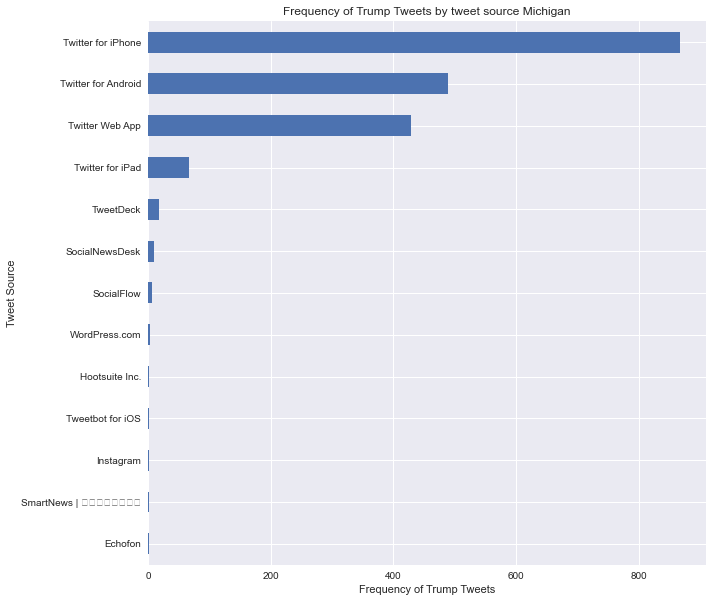

In [ ]:
michigan_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by tweet source Michigan')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## Minnesota

In [ ]:
minnesota_list = []


for location in all_locations:
    if ('minnesota' in location.lower()) or ('MN' in location):
        minnesota_list.append(location)
        

unwanted_minnesota = ['WI viaSD,ROK,MN,NE,IL,IN,DE,NE','MN girl living in East Bay CA','Madison via MN, NYC, and STL ',
                     'SG WI/MPLS MN/MAD WI','Sydney, Utah Minnesota NewYork','IN / CO / MN','Deep South Texas; SW Minnesota',
                     'MN | MI | DC','Minnesota, WI','MN lakes to TN mountains','jersey + minnesota','DET—MNPLS—VAB',
                     'THEGODDAMNSOUTH','SF x MNL',' MN - SD','SD, MN and TEX','none of your DAMN business','Minnesota + Chicago',
                     'WEAR YOUR D*MN MASK. ','Minnesota/Alaska','Minnesota/Florida','Minnesota/Idaho','Lived in ND•MN•TX•GA•CA•NV',
                     'SEA🌊 | MNL🇵🇭 | SF🇺🇸','MN & WI, Where its cold','Minnesota/Sarasota','minnesota/beirut baby','MNL | ᜋᜈᜒᜎ',
                     'Duluth, MN / Superior, WI','Minnesota // England','CA, MN, NV']

minnesota_cleaned = [i for i in minnesota_list if i not in unwanted_minnesota]


minnesota_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in minnesota_cleaned:
    a = df.loc[df['location']==location]
    minnesota_df = minnesota_df.append(a)
    
minnesota_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
1233,BrittanyMH1963,💋Brittles🌹LGBTQ ALLY🏳️‍🌈 Retired TG Chat Owner...,"Central Minnesota, USA",2637.0,2213.0,7659,2020-05-31 02:55:00,2020-11-04 10:35:49,0.0,0,"If Trump ""wins"" another election (with the hel...",Twitter for iPad,[]
1357,a_jenson01,507\n\nBlacklight Visuals,"North Mankato, MN",46.0,47.0,296,2016-04-17 17:41:17,2020-11-04 10:35:44,0.0,0,@Vivian7Godlove @realDonaldTrump Who puts the ...,Twitter for Android,[]
1194562,edavis1007,NaN,"North Mankato, MN",1018.0,122.0,5743.0,2010-11-25 13:44:10,2020-11-07 10:05:04,0.0,0.0,@lakeshow73 The problem with trump supporters ...,Twitter for iPhone,[]
1568,chazrunner,"Looking at my stuff, its pretty obvious. he/him","Greater Twin Cities Area, Minnesota",421.0,118.0,2956,2010-02-10 15:03:11,2020-11-04 10:35:33,0.0,0,"My mom, Democrat, saw a lawn sign that said Tr...",Twitter Web App,[]
1922,EJohns03,Victoria concordia crescit! @Arsenal #BLM ,"Minneapolis, MN",353.0,2112.0,5127,2009-01-05 02:12:13,2020-11-04 10:35:14,0.0,0,"Trump already declared victory, is undermining...",Twitter for iPhone,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183011,tygore7,"Aging but not well or wiser,black lives matter...","St Paul,MN",886.0,93.0,22467.0,2011-02-25 05:20:54,2020-11-07 08:30:00,0.0,0.0,Trump supporters in Pennsylvania gathered for ...,Twitter Web App,[]
1185832,debdona11,"Happily Married, Love God, Family, Friends, An...","Hastings, MN",89.0,90.0,3372.0,2017-09-25 06:04:52,2020-11-07 08:46:44,0.0,0.0,@DebbieSVA @TrumpWarRoom What? If you are talk...,Twitter for iPhone,[]
1191488,pjcadams,Communications Consultant/writer; Tweets: prog...,"Minnesota, USA",3297.0,3908.0,193761.0,2011-04-06 02:47:54,2020-11-07 09:28:02,0.0,1.0,@BenjaminPDixon This is a LIE. They played a k...,Twitter for iPhone,[]
1193487,jgumbel,Bonhoeffer Christian. Mother. Wife. Politicall...,"God's Country, MN",3866.0,2947.0,130185.0,2008-11-24 16:22:21,2020-11-07 09:45:41,0.0,0.0,"💁🏻‍♀️💁🏻‍♀️\n\nMore specifically, I think voter...",Twitter for iPhone,[]


Text(0, 0.5, 'Tweet Source')

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: 

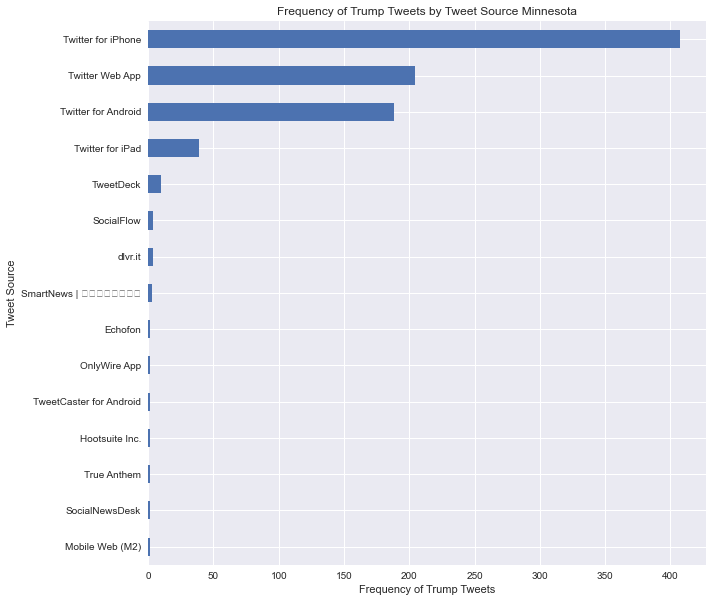

In [ ]:
minnesota_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source Minnesota')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## Nevada

In [ ]:
nevada_list = []


for location in all_locations:
    if ('nevada' in location.lower()) or ('NV' in location):
        nevada_list.append(location)
        


unwanted_nevada = ['SF Bay, So. Ca, Las Vegas, NV','Las Vegas, NV-Belgrade, Serbia','from Mars but the ship landed in Ohio instead of Nevada . . . .',
                  'Ontario, CA / Henderson, NV','New York, Florida, Nevada','DNV, DOC, SWR, TMFAF','Nevada/Washington D.C.',
                  'Nevada City, CA','Elko, NV and Idaho!','Las Vegas, NV  BWO Detroit, MI','DENVER, CO','Lagos, Texas and Nevada (USA)',
                  'JACKSONVILLE, FLORIDA','Las Vegas, NV / Washington, DC','Lived in ND•MN•TX•GA•CA•NV','Nevada City, California', 
                  'geblokkeerd door de hele NVA Charles Michel.ea Devos Noels Rutten','Incline Village Nevada & Pacifica CA','CA, MN, NV',]

nevada_cleaned = [i for i in nevada_list if i not in unwanted_nevada]



nevada_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in nevada_cleaned:
    a = df.loc[df['location']==location]
    nevada_df = nevada_df.append(a)
    
nevada_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
164,catphishdaddy,Dream Redeemer,"Las Vegas, NV",69.0,47.0,690,2020-04-02 07:16:20,2020-11-04 10:36:45,0.0,0,The biggest misstep that Trump supporters make...,Twitter Web App,[]
2061,Beatbyterri,23 yo. Anime🔥 Hopeful Cosplayer🥺 Writer. 💕 Poe...,"Las Vegas, NV",3336.0,4411.0,43692,2015-03-09 03:39:46,2020-11-04 10:35:06,0.0,0,&amp; this is why my heart is so heavy. Both c...,Twitter for iPhone,[]
2315,jordanlaubaugh,Vote,"Las Vegas, NV",494.0,573.0,7454,2009-12-07 15:39:09,2020-11-04 10:34:52,0.0,4,Trump: We don’t want them to find any ballots ...,Twitter for iPhone,[]
131074,LuisBermudezVO,He/Him / Voice Actor / #EvilIdol2019 Champion ...,"Las Vegas, NV",939.0,1779.0,15671,2012-03-21 01:59:24,2020-11-04 10:53:34,0.0,1,"I am convinced that if I go to sleep, I'll wak...",Twitter for Android,[]
131250,karb33,NaN,"Las Vegas, NV",780.0,3543.0,10883,2009-03-24 03:48:54,2020-11-04 10:53:24,0.0,0,Why is it only the states Trump is winning are...,Twitter for Android,"[{'text': 'AmericaDecides2020', 'indices': [88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183811,ballsdeepshirts,NaN,"las vegas, NV",349.0,39.0,868.0,2012-09-17 20:03:20,2020-11-07 08:28:52,0.0,0.0,@DjRodgers1231 They were shook after those res...,Twitter for iPhone,[]
1185602,redzassbereal29,I am me and I like it if you don't thats your ...,Dayton hellhole Nevada LOL,178.0,34.0,1593.0,2011-11-11 08:15:54,2020-11-07 08:47:03,0.0,1.0,@Ninergirl99 None of this changes the fact 8 m...,Twitter Web App,[]
1197290,Being_American_,"Fuck what you heard, it's what you TWEETIN'","Lost Wages, NV",184.0,212.0,10118.0,2012-05-14 09:04:59,2020-11-07 10:22:07,0.0,0.0,I am a military ballot from WA that did not vo...,Twitter for Android,[]
1317992,Stefano4118899,A Freelancer \n\nA Solepreneur \n\nFounder of ...,Nevada,15.0,66.0,14547,2019-10-26 15:43:08,2020-11-07 10:19:45,0.0,0,@Mmmm__echtwaar The vote counting is screwed! ...,Twitter for Android,[]


Text(0, 0.5, 'Tweet Source')

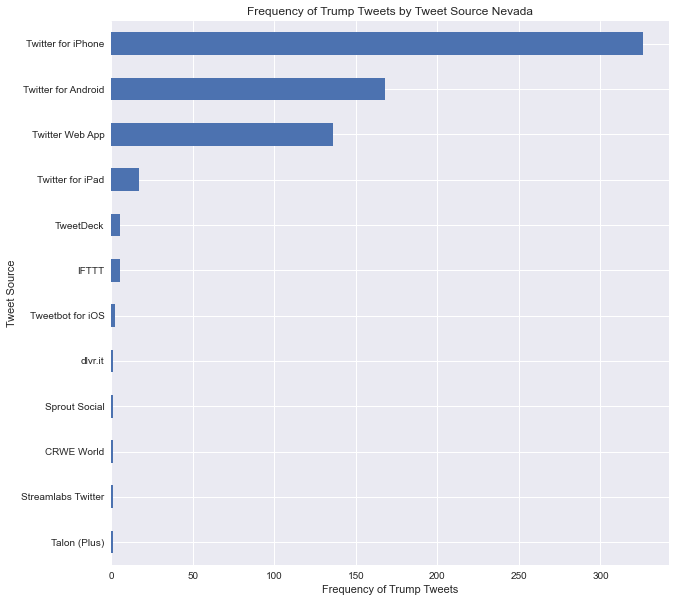

In [ ]:
nevada_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source Nevada')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## Pennsylvannia

In [ ]:
penn_list = []


for location in all_locations:
    if ('pennsylvannia' in location.lower()) or ('PA' in location) or ('penn' in location.lower()):
        penn_list.append(location)

        
unwanted_penn = ['PARODY | fan account. +18','rural CNY, U.S. {PA, IA, Éire}','PARIS','Funabashi city, Chiba, JAPAN',
                'Naya PAKISTAN 🇵🇰','PALM BEACH,LEXINGTON','BRASIL , SAO PAULO , SAO PAULO','JAPAN！','FB PAGE 👉',
                'ONTARIO LOMA LINDA RIVERSIDE REDLANDS PALM SPRINGS RANCHO CUCAMONGA, CALIFORNIA','THRONE OF PAMPS',
                'manilek VDC 8 dadeldhura NEPAL','Pennsyltucky','A True Story on PARLER. ','Baltimore, MD / New Freedom, PA',
                'NW Pennsylvania - Western NY','PA/NYC /Nashville','ESPAÑITA','Sunwal, Nawalparasi, NEPAL','MILANO - PARIS - MOSCOW',
                'Satte City, JAPAN  (幸手市, 日本国)','SOMEWHERE PACING MY DREAMS ','N.Y.C  &  Pennsylvania   ','MI-PA',
                'Florida, but Pennsylvania born','PA➡️TN','WHOLE LOTTA CHOPPA REMIX','POKHARA NEPAL, Now KTM KALANKI','ESPAÑA',
                'MI & PA, USA','PA✈️FL','MD/PA. ','PAÍS VALENCIÀ','CHAPPAQUA, NEW YORK','PARCHESTER VILLAGE ','pennsylvania ☼ west virginia',
                'EUROPA  ','ST PAULI','PALMDIZZLE, CA ','NJ/KY/MD/VA/CA/TN/WA/OR/PA','Chalfont, PA Los Angeles, CA','UPenn. Knicks Memes, MMO & NYC',
                "roaring twenties, tossing pennies in the pool and if my wishes came true it would've been you ",'EriePA✈️SAtx',
                'OUTER SPACE','se PA','HRSHY, PA / RCHSTR, NY','pennington, nj', 'Newton, MA | Philly, PA', 'West Hollywood, CA and PA',
                 'NJ/NYC/PA', 'PARODY', '† In God I Trust - CHAMPAIGN💰', 'USA 🇺🇸 SPARTAN RACE ', 'LAHORE, PAKISTAN', 'Oakland, CA via Pittsburgh, PA',
                 'TAMPA TO LI,NEW YORK', 'Youngstown, OH/Pittsburgh, PA', 'NEPA', 'PA to NJ ', 'COSTA TROPICAL, GRANADA, SPAIN',
                 'in EUROPA', 'Pittsburgh,PA✈️ Denver, CO', 'NJ/PA', 'Pennsauken Township, NJ', 'CO // PA', 'SPACE', 'PATNA',
                 'APAPA', 'PA / London / Oslo / Fecktopia', 'PAKISTAN', 'FUCK ISRAEL, FREE PALESTINE', 'TPA and SF', 'DemPANICKED Hawaii',
                 'I follow GOD—TRUTH—PATRIOTS—Q.', 'Usually VA, DC, PA, and WI', 'Ligonier, PA or Hudson, OH','JAPAN','cairo/dubai  FREE PALESTINE',
                 'PAN India | Karnataka+UP+TN', 'GLOBAL AND ALL OUTER SPACE', 'FL,  PA, Africa', 'Puerto Rico Pennsylvania', 'PA and FL',
                 'CDN in Philly PA & CPT SA ', 'SPAAACE', 'Lutando pelo MEU PAÍS. Sou jornalista e preservo o sigilo da fonte. Tenho problemas mentais, portanto, sou inimputável.',
                 '#Fuckem POT HEAD PARTY! UNITED', 'PA/NJ', 'PA or VA', 'LI/PA', '日本/JAPAN🇯🇵🗼出身は北海道', 'FREE PALESTINE | BLM',
                 'NY/NJ/PA', 'SEPA', 'ABNORMAL SPACE', 'Youngstown, OH/ Erie, PA', 'United States of PATEL', 'That SPACE between your ears',
                 'Murray, KY / Philadelphia, PA', 'PACLAND', 'LAS PALMAS DE G.C', 'PAIN ISLAND', 'PACIFICA', 'THE US OF A. BORN A PATRIOT',
                 'Los Angeles CA/Philly PA', 'I can see Pennsylvania from my house.', 'SHALMALI DWEEPA\n\n', 'Bronx/Queens/DC/NJ/PA/CA',
                 'PARLER. 1pissedpatriot @Kiawik', 'PA/DE', '#PATRIOTSforTRUMP!', 'NY, NJ, CT, GA, OH, CT, PA, VA', 'California, PA, Germany',
                 'Nauvoo. OPA Behemoth', '717 HBG PA', 'PA, MT, CO', 'PALM BEACH.FLORIDA USA', 'NC/VA/OH/GA/NM/PA, USA','CYBERSPACE']

penn_cleaned = [i for i in penn_list if i not in unwanted_penn]


penn_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in penn_cleaned:
    a = df.loc[df['location']==location]
    penn_df = penn_df.append(a)
    
penn_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
67,ImmaBlueDot,Dems&Libs don't love 😷 either. We care about g...,#PA13 #BidenHarris #DemCast,25746.0,25083.0,88003,2011-11-08 03:34:34,2020-11-04 10:36:50,0.0,0,@babby_hull @_donsante @JoyceWhiteVance PA won...,Twitter for Android,[]
455131,ImmaBlueDot,Dems&Libs don't love 😷 either. We care about g...,#PA13 #BidenHarris #DemCast,25738.0,25089.0,88021.0,2011-11-08 03:34:34,2020-11-04 19:22:34,0.0,0.0,*trump began planting seeds of doubt in mail-i...,Twitter for Android,[]
221,Chrissyleely,NaN,Pennsylvania,69.0,12.0,184,2020-10-31 04:16:12,2020-11-04 10:36:43,0.0,0,All these CNN polls are paused on 82% vote cou...,Twitter for Android,[]
2733,jriley126,“It is what it is.” DJT 8/3/2020 Trump thinks...,Pennsylvania,173.0,37.0,4214,2013-04-08 19:25:36,2020-11-04 10:53:45,0.0,0,@mmpadellan Trump doesn’t understand that voti...,Twitter for iPhone,[]
262773,Anushka_Chom,she/her,Pennsylvania,64.0,237.0,5854,2019-03-30 01:56:13,2020-11-04 10:52:08,0.0,0,@Wildest_taystan She doesn't support Trump omg,Twitter Web App,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193299,DavidWhitehil11,NaN,"Tidioute Pennsylvania, USA",67.0,3.0,84.0,2020-09-19 19:03:10,2020-11-07 09:45:59,0.0,0.0,@JoannaMMeyer @kayleighmcenany @realDonaldTrum...,Twitter for Android,[]
1196256,DavidWhitehil11,NaN,"Tidioute Pennsylvania, USA",67.0,3.0,87.0,2020-09-19 19:03:10,2020-11-07 10:02:22,0.0,0.0,@JustVent6 @kayleighmcenany @realDonaldTrump O...,Twitter for Android,[]
1197029,PolitomixNews,"The political news wire where left, right, and...","Philadelphia, PA USA",219.0,348.0,92220.0,2012-06-21 20:35:49,2020-11-07 10:22:32,0.0,0.0,"Rupert Murdoch-owned US outlets turn on Trump,...",dlvr.it,[]
1580211,elkmtstudio,Oldschool artist on all four sides,NE PA,249.0,302.0,7189,2010-01-03 16:33:37,2020-11-07 10:19:09,0.0,0,"@NPR @CloudContact Bannon, Miller and Trump ri...",Twitter for iPad,[]


Text(0, 0.5, 'Tweet Source')

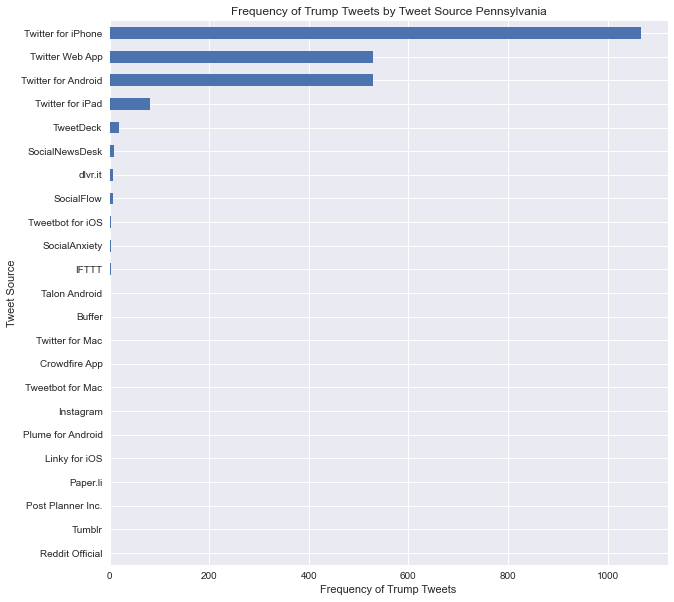

In [ ]:
penn_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source Pennsylvania')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## New Hampshire

In [ ]:
newhamp_list = []


for location in all_locations:
    if ('new hampshire' in location.lower()) or ('NH' in location):
        newhamp_list.append(location)


unwanted_newhamp = [ 'Manhattan, NY  & Rye, NH', 'NH and DC', 'NC via VA, AZ, NH, NM, and IL', 'Stardust ACNL, Aurora ACNH',
                    '🌊BIDENHARRIS2020🥳😷', 'NH/VT/MA, USA',  'Sharon, MA, and Southern NH', 'Los Angeles | New Hampshire',
                    'Maine/New Hampshire','VANHALLA ', 'Calico Bay, ACNH', 'HO CHI MINH CITY, VIETNAM', 'Australia via Concord NH',
                    'PFP is Osha, my ACNH villager', 'Boston, MA / Salem, NH', 'NH-01 // -8.5, -6.41']

newhamp_cleaned = [i for i in newhamp_list if i not in unwanted_newhamp]


newhamp_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in newhamp_cleaned:
    a = df.loc[df['location']==location]
    newhamp_df = newhamp_df.append(a)
    
newhamp_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
2507,DonnaMWestbrook,New England gal. Mom to the best son in the wo...,Progressive New Hampshire USA,342.0,215.0,20720,2012-02-08 14:37:34,2020-11-04 10:53:58,0.0,0,@MorningJoe_ No. The Dems did it right. They ...,Twitter for Android,[]
131660,ourrepublic76,Standing for democratic institutions and value...,New Hampshire,1840.0,725.0,58205,2016-03-01 22:46:07,2020-11-04 10:53:01,0.0,0,Our future if trump wins. Fun. https://t.co/eB...,Twitter for iPhone,[]
497457,BenintendiLori,Saved,New Hampshire,13.0,3.0,93,2020-10-03 21:11:07,2020-11-05 00:57:46,0.0,0,@FoxNews I don't feel assured with Biden win i...,Twitter for Android,[]
1105835,hdrnz,@hdrnz account is temporarily unavailable beca...,New Hampshire,799.0,757.0,28859,2013-01-24 08:51:02,2020-11-05 12:10:46,0.0,0,biden - 264\ntrump - 214\nhotel - trivago http...,Twitter for iPhone,[]
394570,qman441,NaN,"New Hampshire, USA",52.0,14.0,257,2020-03-25 19:30:40,2020-11-04 11:10:10,0.0,0,Good Morning folks @JackPosobiec @realDonaldTr...,Twitter for iPhone,"[{'text': 'Trump2020', 'indices': [202, 212]}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180778,FaltusEugene,Retired radio engineer. Avid Democrat and volu...,Keene NH,359.0,1957.0,1776.0,2019-08-25 04:34:09,2020-11-07 08:12:48,0.0,0.0,@lennecefer Code talkers are a national treasu...,Twitter for Android,[]
1182437,UE_UpperEchelon,The Core UEG. Twitch: https://t.co/s2DqhoCt4U ...,PO Box 151 Marlborough NH 03455,81.0,15856.0,6928.0,2016-07-26 19:28:42,2020-11-07 08:30:50,1.0,4.0,"""Truth and reconciliation committees""\n\nA rev...",Twitter for Android,[]
1189435,murphyfmichael4,NaN,"Farmington, New Hampshire",131.0,51.0,2845.0,2010-05-18 16:14:43,2020-11-07 09:31:06,0.0,0.0,@sav_lauri @d_elyssia @Cnoelcisco @jsolomonRep...,Twitter for iPhone,[]
1192299,gladhill_in,Broadcast Journalism~Radio AFTRA ~ Poetry~ Mar...,"Rye, NH ~ My Happy Harbor",6469.0,6449.0,13398.0,2019-06-15 04:06:53,2020-11-07 09:47:32,0.0,0.0,#Trump God 🔨⚒️🔨dropped the Hammer ~Lynn \nhtt...,Twitter Web App,"[{'text': 'Trump', 'indices': [0, 6]}]"


Text(0, 0.5, 'Tweet Source')

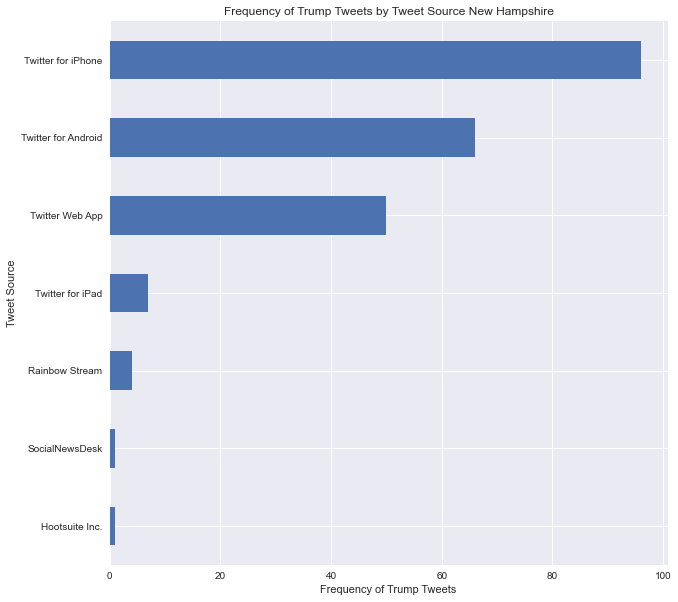

In [ ]:
newhamp_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source New Hampshire')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## North Carolina

In [ ]:
northcarolina_list = []


for location in all_locations:
    if ('north carolina' in location.lower()) or ('NC' in location):
        northcarolina_list.append(location)
        

unwanted_northcarolina = [ 'USES FUNCTIONING BRAIN CELLS', 'NeoZone, NCT', 'ONTARIO LOMA LINDA RIVERSIDE REDLANDS PALM SPRINGS RANCHO CUCAMONGA, CALIFORNIA',
                          'CHORLTON. SOUTH MANCHESTER.', 'FRANCE/SOON IN KYOTO', 'SKZ SHINee D6 SVT BTS NCT ATZ', 'CA NY NC',
                          'OH, FL, NC, AZ, & now NorCal', 'NCC-1701', 'CLT | NC ', 'NC ✈️ DC', 'BEYONCE', 'NC || MEX ', 'AJ HINCH SZN',
                          'S.F., CA ⇔ KCMO ⇔ Charlotte NC', 'California, New York, NC', 'NCC-1701 Bridge', "ON GOD'S INSSURANCE ACCOUNT",
                          'USS Excalibur NCC-1705-E', 'Raleigh, NC ✈️ DC', 'Ouseburn Valley, NCL', 'BTS!TWICE!LOONA!NCT', 'WNCLOVE!!!',
                          'NC ✈️ OH', 'DELHI NCR', 'NC 📍D(M)V ', 'PAÍS VALENCIÀ', 'Delhi, NCR', 'Delhi / NCR', 'Fairfield, PA.   #RESISTANCE',
                          " In DNC's head ", 'NC transplant in Eugene, OR', 'Durham, NC ➡️ Knoxville, TN', 'From NC but live elsewhere',
                          'NCR, Philippines & Seattle, WA', 'Salford , LANCASHIRE ', 'GRAND  BLANC,    MI  48439', 'Raleigh, NC ✈ Washington, DC',
                          'WOMANCHESTER', 'NC ✈️ TX', 'Michigan, North Carolina, VA', 'DC/NC/IA/VT', 'MD/NC', 'MI/WNC/FL ', 'Fabulous Fuquay Varina NC',
                          'From NJ to NC to SC ', 'Based, INC. HQ', 'NCAT', 'SAN FRANCISCO, CA', 'Los Angeles/ Florida/ NC',
                          'NC/Georgia', "ELI / XENOS #* HE \\ XE \\ IT \\ CORPSE #' GNC TRANSMASC LESBIAN #! 4TEEN #% INFJ 6W5 ## MENTALLY ILL! #; d 𓅓{ ꟻ (̲▽̲) ̲F } b #⠀⠀⠀⠀TW TAG RATS & MICE",
                          'ATL via Milwaukee ♢ HU ♢ & NC ♢', 'NY✈NC✈NJ', 'NORTH CAROLINA,MASSACHUSETTS', 'SS Bonaventure 10281-NCC',
                          'Madhubani, India / DelhiNCR ', 'NCR', 'Atlanta, GA/Highlands, NC', 'Brooklyn NY, Charlotte NC ', 'Mentally in Wilmington, NC',
                          'BONIFACIO GUTIERREZ LANCERO', 'North Carolina, Chi-Town', 'NC, NY, ATL, LA', 'Wilmington, NC / Stow, OH',
                          'LONG LIVE THE 💥RESISTANCES💥', 'LA, NY, NC', 'TWEETS AREN’T FINANCIAL ADVICE', 'New York-Texas-North Carolina',
                          'NCR, Philippines', 'Boston MA, Raleigh NC, Vermont', 'North Carolina/Austin', 'Raleigh, NC & Albany, NY',
                           'A Lab Council, A LAB COUNCIL', 'Raleigh, NC —— LA, CA', 'PNC Arena', 'NCR, and all over India', 'Rehoboth Beach, DE, NC',
                          'AR.CA.NC.HI.OIF.CA.AR.AZ.AR', 'MANCHESTER UK', 'North Carolina / Philly', 'Lyon   (FRANCE)', 'Wales, UK & NC, USA(family)',
                          'Illinois. NM. NC. Mass. FLA', 'Atlanta, GA|Charlotte, NC, USA', 'NC/VA/OH/GA/NM/PA, USA', 'VINCENNES / BOURGES. ']

northcarolina_cleaned = [i for i in northcarolina_list if i not in unwanted_northcarolina]


northcarolina_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in northcarolina_cleaned:
    a = df.loc[df['location']==location]
    northcarolina_df = northcarolina_df.append(a)
    
northcarolina_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
27,EfeSaidSo,I'm an Anarcho-Communist effectively utilizing...,North Carolina (soon),265.0,614.0,14097,2020-05-29 22:31:26,2020-11-04 10:36:52,0.0,0,@RussTheGreat2 @JoseWithOranges ion fuck with ...,Twitter Web App,[]
281,FATIMAMCCONNEL1,Planet lover/traveler/wine drinker fighting fo...,"North Carolina, USA",73.0,31.0,2296,2019-08-31 21:22:28,2020-11-04 10:36:40,0.0,0,@dkr1450 @realDonaldTrump Great we will send h...,Twitter for Android,[]
743,CallicuttJesse,Father MMA lover smart azz and occasionally a ...,"North Carolina, USA",286.0,44.0,2323,2018-08-29 22:46:56,2020-11-04 10:36:14,0.0,0,@RyanMSU21 @MPG37685458 @ABC We want all votin...,Twitter for Android,[]
1476,JDavisMyers,"Christian, Husband & Dad, Ethical Real Estate ...","North Carolina, USA",85.0,20.0,155,2020-05-15 04:25:25,2020-11-04 10:35:38,0.0,0,"@JasonFoxworth4 @LegendaryEnergy Actually, Wis...",Twitter for Android,[]
2110,kpakposkii,I never hate and don't classify me as one. I l...,"North Carolina, USA",282.0,93.0,2167,2016-08-04 19:20:17,2020-11-04 10:35:03,0.0,2,Really disappointing from Trump #Election2020 ...,Twitter for iPhone,"[{'text': 'Election2020', 'indices': [32, 45]}..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197765,wade_boo,Wade 4 Life\n❎❎,Henderson NC,44.0,8.0,8634.0,2014-02-03 15:35:40,2020-11-07 10:21:26,0.0,0.0,"@CraggyRob @realDonaldTrump They are. You see,...",Twitter Web App,[]
1198473,wade_boo,Wade 4 Life\n❎❎,Henderson NC,44.0,8.0,8634.0,2014-02-03 15:35:40,2020-11-07 10:20:16,0.0,0.0,@realDonaldTrump Don't give up. We will stand ...,Twitter Web App,[]
1712034,Jimmy76611563,Southern Born and Breed Hard working American\...,"Western North Carolina, USA",54.0,2.0,2288,2019-06-26 21:20:37,2020-11-07 10:37:13,0.0,0,"@dbongino Was going to read the Twitter post, ...",Twitter for Android,[]
1712193,MrRawBalls,Easy going and love music especially playing t...,Outer Banks NC,139.0,20.0,657,2010-06-24 22:21:48,2020-11-07 10:36:56,0.0,0,@realDonaldTrump If they don’t separate those ...,Twitter for iPhone,[]


Text(0, 0.5, 'Tweet Source')

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: 

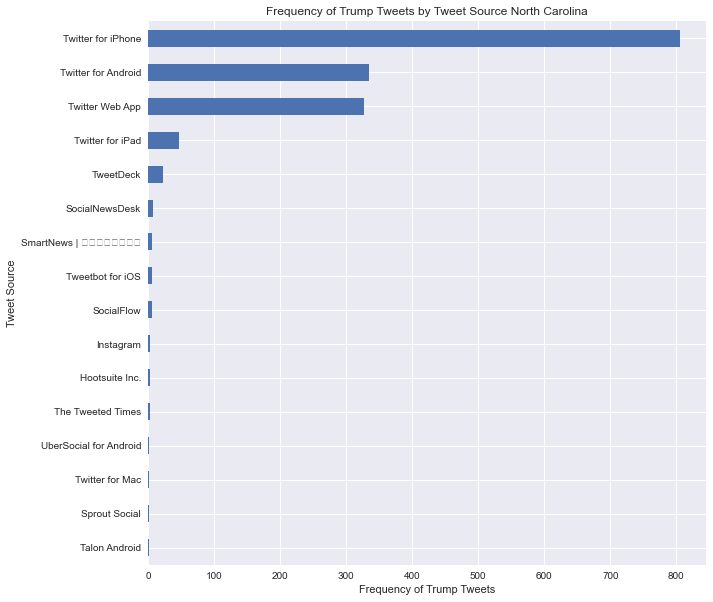

In [ ]:
northcarolina_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source North Carolina')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

## Wisconsin

In [ ]:
wisconsin_list = []


for location in all_locations:
    if ('wisconsin' in location.lower()) or ('WI' in location):
        wisconsin_list.append(location)
        

unwanted_wisconsin = [ 'Chi & occasionally WI ', 'Wisconsin & Minnesota, USA', 'TWITZERLAND', 'Covfefe (pre-Flood: "In the End, WE WIN!")',
                      'SG WI/MPLS MN/MAD WI', 'WISH it were the Maldives!', "SWIM'N IN A SUPERNOVA", 'BTS!TWICE!LOONA!NCT',
                      'WORLDWIDE', 'SWIM@ BEACH WITH  TRUMP LOVERS', 'YOU WILL NEVER KNOW!', 'WI to CA ', 'Korea....I WISH!',
                      'WORLD WIDE WEB', 'TREAT PEOPLE WITH KINDNESS', 'WHERE THE WINNERS ARE', 'UNDER GODS WINGS', 'Florida, Wisconsin,Ohio',
                      'BAD BITCH WITH NICE TITIES', 'WORLDWIDE AND WITH GOD', 'BUSHWICK BROOKLYN NIGGA!', 'Usually VA, DC, PA, and WI',
                      'Milwaukee, WI . Kalkar Germany', 'WARNING I WILL OFFEND YOU', '#WINNING ', 'Hazel Park, MI Orfordville, WI',
                      'NATIONWIDE', 'MN & WI, Where its cold', 'Bettendorf, IA | Madison, WI', 'WORLDWIDE RAIDERNATION',
                      'Superior WI ◊ Duluth MN', 'WORLD WIDE  GLOBAL NEWS AND REPORTS', 'AMMES saved my life TWICE! TY!', 'WORLD WIDE ',
                      'WORLDWIDE ', 'Duluth, MN / Superior, WI', 'Venice, FL and Appleton, WI', 'SWITZERLAND']

wisconsin_cleaned = [i for i in wisconsin_list if i not in unwanted_wisconsin]

wisconsin_df = pd.read_csv('247500_totaloutput_9parts.csv',nrows=0)

for location in wisconsin_cleaned:
    a = df.loc[df['location']==location]
    wisconsin_df = wisconsin_df.append(a)
    
wisconsin_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags
40,jim_haack,"Love star wars, star trek, super hero, horror,...",Wisconsin USA,956.0,127.0,5751,2012-01-29 20:35:21,2020-11-04 10:36:52,0.0,0,@realDonaldTrump lying to the end,Twitter Web App,[]
492615,codeweiller,NaN,Wisconsin USA,107.0,64.0,342,2012-03-03 03:28:39,2020-11-05 00:14:05,0.0,0,@realDonaldTrump @BreitbartNews Just hand it o...,Twitter for iPhone,[]
1191143,chuckrachel97,Veteran of US Army Follower of God!! father of...,Wisconsin USA,1334.0,878.0,10495.0,2013-02-26 22:59:37,2020-11-07 09:28:34,0.0,0.0,God bless @realDonaldTrump and his family,Twitter for iPhone,[]
1201,NyssaTheHobbit,"writer, homemkr, Gen-Xer, libtard, wife 23 yrs...","Fond du Lac, Wisconsin, USA",241.0,341.0,32420,2016-12-22 00:27:59,2020-11-04 10:35:51,0.0,1,@AngrierWHStaff Sleeping? When we're almost d...,Twitter Web App,[]
1318,Cli91121406,2A - 1A - patriot,"Wisconsin, USA",71.0,3.0,96,2020-10-27 14:40:52,2020-11-04 10:35:46,0.0,0,@CHIZMAGA The dems are making more votes. They...,Twitter for iPhone,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185918,SayrahDatIs,"Mother, Daughter, Green Bay Packers Fan🧀 Fight...","Brew City, Wisconsin",2890.0,1998.0,12095.0,2011-12-09 20:26:43,2020-11-07 08:46:37,0.0,0.0,@DCfegan @realDonaldTrump Awwww...poor you. I...,Twitter for iPhone,[]
1197568,SayrahDatIs,"Mother, Daughter, Green Bay Packers Fan🧀 Fight...","Brew City, Wisconsin",2890.0,1997.0,12101.0,2011-12-09 20:26:43,2020-11-07 10:21:42,0.0,0.0,@SteveSchmidtSES @realDonaldTrump Dear @SteveS...,Twitter for iPhone,[]
1189140,hillbilly717,"Born again American Veteran,wonderwelder, doit...",Iron Ridge WI,811.0,676.0,16257.0,2009-03-16 19:04:10,2020-11-07 09:11:00,0.0,0.0,@realDonaldTrump Sir the LORD despises LAWYERS...,Twitter Web App,[]
1194796,wallberg2312,Love the USA!! Our Vets...God & Country. Suppo...,Clear Lake Wisconsin,6596.0,6167.0,22941.0,2012-10-12 13:08:22,2020-11-07 10:04:41,0.0,0.0,@MoeJumbles @Gribbs7 @Godwins1234 It’s called ...,Twitter for iPhone,[]


Text(0, 0.5, 'Tweet Source')

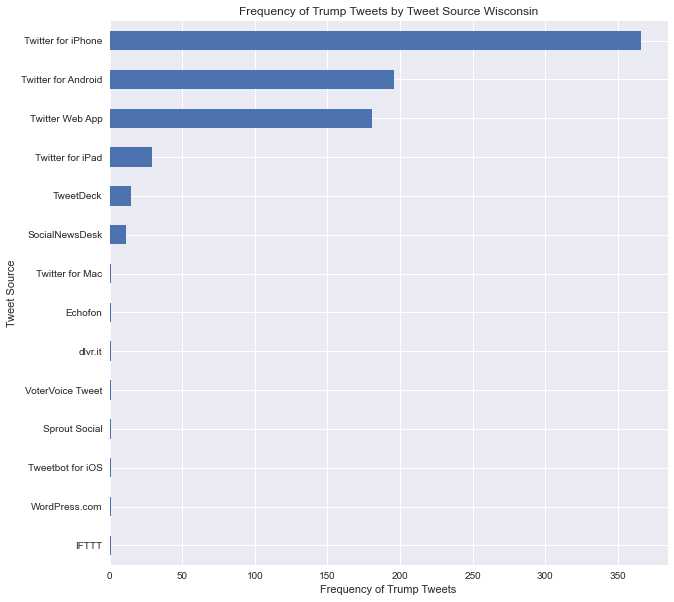

In [ ]:
wisconsin_df['tweetsource'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10))
plt.title('Frequency of Trump Tweets by Tweet Source Wisconsin')
plt.xlabel('Frequency of Trump Tweets')
plt.ylabel('Tweet Source')

Looking at the tweet sources for all 9 swing states, Twitter for iPhone has the highest frequency of tweets on trump while the top 3 for all three are Twitter for iPhone, Twitter for Android, and Twitter Web App with Twitter for Android and Twitter Web App alternating between the second and third most frequency depending on the state. Now we have all of the data we need to perform our sentiment analysis of Donald Trump in the 9 swing states.

# Sentiment Analysis with NLTK

NLTK is the package we decided to use for sentiment analysis. The SentimentIntensityAnalyzer() method gives us a sentiment 4 scores for the text we place in its parameters:

1. negative sentiment score (neg)
2. neutral sentiment score (neu)
3. positive sentiment score (pos)
4. compound score (compound)

What we need to focus on is the compound score. The compound score is a metric that calculates the sum of all lexicon ratings and is normalized to e between -1 and +1, with -1 being the most extreme negative sentiment and the +1 being the most extreme positive sentiment. 

We're going to loop through each row of data in every swing states dataframe and get a record of all 4 scores for each into the state dataframe by creating new columns ['neg','neu','pos','compound'].Then we're going to display the average score for each new column for each swing state.

##### All of the tweets are about Trump, so a negative sentiment would be against him and while a positive sentiment would be for him.  For example, that means a negative value for average compound score for a state would mean that the sentiment for him in that state is negative. The tweeters on average have a negative opinion of Trump there.

In [ ]:
analyzer = SentimentIntensityAnalyzer()

## Georgia Sentiment Analysis

In [ ]:
georgia_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in georgia_df['text']]
georgia_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in georgia_df['text']]
georgia_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in georgia_df['text']]
georgia_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in georgia_df['text']]

georgia_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
328,TGS_24,NaN,Georgia,197.0,199.0,2951,2014-06-08 04:28:38,2020-11-04 10:36:37,0.0,0,@NBAMemes You do know if Biden wins WI Trump s...,Twitter for iPhone,[],0.8126,0.000,0.575,0.425
393870,JV_Dzhuga,You cannot make a revolution with silk gloves....,Georgia,3329.0,3206.0,12672,2018-03-01 00:41:20,2020-11-04 11:10:49,0.0,0,@NstyWmnWendy @Theon_Orbis @realDonaldTrump Mr...,Twitter Web App,"[{'text': 'banktrumpt', 'indices': [48, 59]}]",-0.1280,0.131,0.780,0.089
400654,JadRabit,"He/She | Parent, Spouse, Gamer, part-time Stre...",Georgia,411.0,179.0,4682,2010-08-19 20:56:43,2020-11-04 11:44:41,0.0,1,@Tomaltach777 Oh yeah. It's a total shitshow. ...,Twitter for Android,"[{'text': 'FuckTheUSA', 'indices': [198, 209]}]",0.3751,0.111,0.720,0.169
400985,maria_mu2,Business & Finance Government & Politics News,Georgia,388.0,374.0,12099,2016-12-30 00:33:06,2020-11-04 12:04:25,0.0,0,"@rdeane13 Agree 2016 outcome was late, but PA ...",Twitter for iPad,[],0.1901,0.000,0.926,0.074
406903,southpaw_GA,Trying to save our Republic and Planet from t...,Georgia,5072.0,4636.0,69003,2017-02-07 14:16:48,2020-11-04 12:41:04,0.0,0,I never imagined that there was this many hate...,Twitter for Android,"[{'text': 'GenZ', 'indices': [114, 119]}]",-0.5267,0.189,0.711,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194370,troymation,NaN,"Buford, GA",773.0,62.0,2800.0,2009-12-23 14:38:26,2020-11-07 09:44:22,0.0,0.0,The left: \n\n“Trump is illegitimate! Russia h...,Twitter for iPad,[],-0.3561,0.114,0.813,0.073
1196841,JorgWashingMac7,President Failure makes me vomit. Imma go drin...,"🇺🇸Atlanta, Georgia🇺🇸",13.0,4.0,348.0,2020-07-30 18:36:34,2020-11-07 10:01:24,0.0,0.0,@HardscopingHo3 @CarltonWorthen @realDonaldTru...,Twitter Web App,[],0.0000,0.000,1.000,0.000
1197106,Joe4Dunwoody,"Council Member, City of Dunwoody GA. HCM Solut...","Dunwoody, Georgia USA",1418.0,678.0,3129.0,2008-12-22 18:32:32,2020-11-07 10:22:24,0.0,0.0,The current narrative from TrumpWorld on Trump...,Twitter for iPhone,[],0.2960,0.000,0.879,0.121
1712038,scottisatwork,goodbye. see you on parler.,"lockdown, GA",558.0,440.0,28561,2009-04-21 02:29:38,2020-11-07 10:37:13,0.0,0,.@realDonaldTrump \n\nDisgusting. Barr is usel...,Twitter for iPad,[],-0.7351,0.608,0.392,0.000


In [ ]:
georgia_df[['compound','neg','neu','pos']].mean()

compound   -0.014640
neg         0.112282
neu         0.782746
pos         0.104969
dtype: float64

We can see that the compound score for Georgia is in the negative. The overall trend in Georgia seems to be that tweeters do not see Trump in a good light. We know that Georgia historically went Blue, becoming a Democratic state in the election. The compound score leaning toward a negative sentiment could be hinting that there is some type of relationship.

## Florida Sentiment Analysis

In [ ]:
florida_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in florida_df['text']]
florida_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in florida_df['text']]
florida_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in florida_df['text']]
florida_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in florida_df['text']]

florida_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
10,LeeKessler18,Mother of 4 legged 11 year old and a lover of ...,"Florida, USA",233.0,221.0,6011,2018-10-26 11:40:11,2020-11-04 10:36:53,0.0,0,@kylegriffin1 Somebody please explain to Trump...,Twitter Web App,[],0.3182,0.000,0.850,0.150
54,futzskull,MooGee with a hard G.\nI grow on people. A cur...,"Florida, USA",411.0,35.0,687,2020-10-16 20:33:20,2020-11-04 10:36:51,0.0,0,"AP didn't factor in 300,000 ballots sitting in...",Twitter for Android,"[{'text': 'MiamiDadeUSPS', 'indices': [51, 65]}]",0.0000,0.000,1.000,0.000
81,Angel1000prcenr,I'm an educator. I'm into animal rescue & help...,"Florida, USA",1035.0,216.0,45498,2016-07-27 15:53:27,2020-11-04 10:36:50,0.0,0,"Keep in mind, if trump loses, there is a way w...",Twitter for Android,[],-0.4019,0.084,0.882,0.034
252,TamiOCo28767819,"Proud mom, wife, EWU alum, teacher, and USAF v...","Florida, USA",113.0,26.0,433,2019-07-17 19:36:11,2020-11-04 10:36:41,0.0,0,@joshgad Of course you would say that! It’s a ...,Twitter for iPhone,[],0.5550,0.000,0.828,0.172
623,AprylSoderlund,🇺🇸PROUD AMERICAN 4 TRUMP😇💜🇺🇸Widow Of a VietNam...,"Florida, USA",4981.0,4334.0,35357,2013-08-09 13:58:42,2020-11-04 10:36:21,0.0,1,Yes. Putting off the inevitable truth of Trump...,Twitter for Android,[],0.8689,0.000,0.597,0.403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198168,RobertW51496420,Just a chilled guy. I don't judge. Everything ...,"Seffner, FL",226.0,63.0,1856.0,2019-10-21 22:11:14,2020-11-07 10:20:47,0.0,1.0,@MollyJongFast @FauciFan See like I've been sa...,Twitter for Android,[],0.6908,0.000,0.725,0.275
1198571,dlm52929,NaN,Southwest FL,157.0,19.0,5464.0,2017-01-20 01:41:16,2020-11-07 10:20:07,0.0,0.0,@rooshv Lol. They think anyone cares about the...,Twitter for iPhone,[],-0.3182,0.173,0.704,0.124
1580315,mrgoodbar404,(Visit our Network) https://t.co/biykbJg7sL,"florida,usa",4937.0,2238.0,15069,2013-05-11 19:54:59,2020-11-07 10:18:58,0.0,0,"Mark Meadows, Trump’s Chief of Staff, Has the ...",Twitter for Android,"[{'text': 'quality', 'indices': [111, 119]}, {...",0.0258,0.083,0.830,0.087
1580466,EdwardAshton30,🇺🇸 REBEL WITH A CAUSE 🇺🇸 LIFE IS A GIFT 🇺🇸 TO ...,PALM BEACH.FLORIDA USA,4923.0,31498.0,202004,2012-08-01 11:31:59,2020-11-07 10:40:14,0.0,0,"""BREAKING NEWS"" Leftists, Never Trumpers Begin...",Twitter for Android,[],0.4404,0.000,0.818,0.182


In [ ]:
florida_df[['compound','neg','neu','pos']].mean()

compound   -0.006782
neg         0.111407
neu         0.780081
pos         0.108501
dtype: float64

The sentiment of Florida Tweeters on Trump from the sample we collected is leaning negative. This is surprising given the fact that Florida voted for Trump with a pretty big margin. We can see however, that Florida's compound score is much closer to 0 than Georgia's. 

## Michigan Sentiment Analysis

In [ ]:
michigan_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in michigan_df['text']]
michigan_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in michigan_df['text']]
michigan_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in michigan_df['text']]
michigan_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in michigan_df['text']]

michigan_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
211,THEREALDJ485,if it ain’t beneficial it’s artificial💯,"Flint, MI",249.0,25.0,217,2015-03-12 02:55:06,2020-11-04 10:36:43,0.0,0,@dowhatlightsyou @dougducey @realDonaldTrump @...,Twitter for iPhone,[],-0.7301,0.120,0.853,0.027
394954,IamDankja,busy . paid . n blessed . 23 ♒️ 🌈,"Flint, MI",198.0,343.0,2059,2015-11-25 13:31:44,2020-11-04 11:09:50,0.0,0,and what’s crazy is trump told his people not ...,Twitter for iPhone,[],-0.3400,0.146,0.854,0.000
419958,SashaTamya5,🥰🏳️‍🌈🌈 | Sc: sashatamya | Ig: sashatamyaa | Fu...,"Flint, MI",951.0,763.0,3667,2018-09-10 01:20:28,2020-11-04 14:19:01,0.0,0,@x__xCheybabi 😂😂😂😂 and i doubt if people some ...,Twitter for iPhone,[],0.1779,0.101,0.769,0.130
420782,BedrockSway,Stoner 🍃//Rapper/Producer from that CO shit 🧠/...,"Flint, MI",7609.0,7676.0,76286,2014-07-31 14:01:21,2020-11-04 14:18:39,0.0,0,@Stradfather @TukeLenkku Michigan is gonna com...,Twitter for Android,[],0.0785,0.139,0.674,0.187
430126,RoxanneRhoads,"Book Publicist, Author, Crafter - Lover of Boo...","Flint, MI",9572.0,9483.0,90467,2009-05-09 19:11:50,2020-11-04 15:43:26,0.0,0,@realDonaldTrump The ballots are not surprises...,Twitter Web App,[],-0.6593,0.218,0.782,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580702,chiefplan1,"published poet, former journalist/chief planne...","Lansing,MI",4837.0,3540.0,34177,2013-03-22 20:56:05,2020-11-07 10:39:53,0.0,0,"@paulsperry_ @realDonaldTrump No harvesting, o...",Twitter for Android,[],-0.4767,0.158,0.781,0.061
1196204,JayMay1976,Podcaster and (nobody asked for) opinion giver...,"Detroit-ish, Michigan",209.0,46.0,345.0,2010-03-21 20:06:19,2020-11-07 10:02:27,0.0,0.0,@cpdillonjr @ABC Not saying that Trump doesn't...,Twitter for Android,[],0.1618,0.078,0.795,0.127
1196419,ertraub,"MI-IN-TN-MI. I use twitter for sports, science...",backwoods Michigan,408.0,131.0,3132.0,2015-07-13 14:02:12,2020-11-07 10:02:06,0.0,0.0,Lincoln Project made a difference. Was part of...,Twitter for iPhone,[],0.8750,0.000,0.792,0.208
1197616,LouGarza68,I fought the law but the law won... 🌊 #Resist 🌊,"Auburn Hills, MI",171.0,169.0,204.0,2020-11-06 09:39:55,2020-11-07 10:21:39,0.0,0.0,@JeNn75497320 @EricTrump @DNC If the shoe was ...,Twitter for Android,[],-0.1027,0.039,0.930,0.032


In [ ]:
michigan_df[['compound','neg','neu','pos']].mean()

compound   -0.004915
neg         0.112584
neu         0.779583
pos         0.107834
dtype: float64

We can see that Michigan Tweeters views Trump in a negative light as well. Biden won the state in the election so this result is not surprising, however the magnitude of the compound score is pretty surprising give that Trump won Florida and they had a compound score of around -0.007 and we see a score close to that at around -0.005 for Michigan. This may be hinting that there is either no relationship between Margin of Victory/Defeat vs. the Sentiment for Trump or a very weak one. 

## Minnesota Sentiment Analysis

In [ ]:
minnesota_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in minnesota_df['text']]
minnesota_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in minnesota_df['text']]
minnesota_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in minnesota_df['text']]
minnesota_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in minnesota_df['text']]

minnesota_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
1233,BrittanyMH1963,💋Brittles🌹LGBTQ ALLY🏳️‍🌈 Retired TG Chat Owner...,"Central Minnesota, USA",2637.0,2213.0,7659,2020-05-31 02:55:00,2020-11-04 10:35:49,0.0,0,"If Trump ""wins"" another election (with the hel...",Twitter for iPad,[],0.8718,0.000,0.775,0.225
1357,a_jenson01,507\n\nBlacklight Visuals,"North Mankato, MN",46.0,47.0,296,2016-04-17 17:41:17,2020-11-04 10:35:44,0.0,0,@Vivian7Godlove @realDonaldTrump Who puts the ...,Twitter for Android,[],0.6956,0.000,0.676,0.324
1194562,edavis1007,NaN,"North Mankato, MN",1018.0,122.0,5743.0,2010-11-25 13:44:10,2020-11-07 10:05:04,0.0,0.0,@lakeshow73 The problem with trump supporters ...,Twitter for iPhone,[],0.4404,0.074,0.771,0.154
1568,chazrunner,"Looking at my stuff, its pretty obvious. he/him","Greater Twin Cities Area, Minnesota",421.0,118.0,2956,2010-02-10 15:03:11,2020-11-04 10:35:33,0.0,0,"My mom, Democrat, saw a lawn sign that said Tr...",Twitter Web App,[],-0.7430,0.240,0.760,0.000
1922,EJohns03,Victoria concordia crescit! @Arsenal #BLM ,"Minneapolis, MN",353.0,2112.0,5127,2009-01-05 02:12:13,2020-11-04 10:35:14,0.0,0,"Trump already declared victory, is undermining...",Twitter for iPhone,[],-0.3612,0.128,0.872,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183011,tygore7,"Aging but not well or wiser,black lives matter...","St Paul,MN",886.0,93.0,22467.0,2011-02-25 05:20:54,2020-11-07 08:30:00,0.0,0.0,Trump supporters in Pennsylvania gathered for ...,Twitter Web App,[],0.3400,0.078,0.784,0.137
1185832,debdona11,"Happily Married, Love God, Family, Friends, An...","Hastings, MN",89.0,90.0,3372.0,2017-09-25 06:04:52,2020-11-07 08:46:44,0.0,0.0,@DebbieSVA @TrumpWarRoom What? If you are talk...,Twitter for iPhone,[],0.0000,0.000,1.000,0.000
1191488,pjcadams,Communications Consultant/writer; Tweets: prog...,"Minnesota, USA",3297.0,3908.0,193761.0,2011-04-06 02:47:54,2020-11-07 09:28:02,0.0,1.0,@BenjaminPDixon This is a LIE. They played a k...,Twitter for iPhone,[],-0.1027,0.173,0.643,0.184
1193487,jgumbel,Bonhoeffer Christian. Mother. Wife. Politicall...,"God's Country, MN",3866.0,2947.0,130185.0,2008-11-24 16:22:21,2020-11-07 09:45:41,0.0,0.0,"💁🏻‍♀️💁🏻‍♀️\n\nMore specifically, I think voter...",Twitter for iPhone,[],-0.8151,0.199,0.726,0.075


In [ ]:
minnesota_df[['compound','neg','neu','pos']].mean()

compound   -0.004345
neg         0.110013
neu         0.784643
pos         0.105341
dtype: float64

Minnesota has a compound score similar to Michigan. This may have something to do with the geographic proximity of Minnesota and Michigan. Geography is one of the factors noted in analyses around election results, but that is beyond the scope of the analysis being done here. However,it is something to note for future analysis.

## Nevada Sentiment Analysis

In [ ]:
nevada_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in nevada_df['text']]
nevada_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in nevada_df['text']]
nevada_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in nevada_df['text']]
nevada_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in nevada_df['text']]

nevada_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
164,catphishdaddy,Dream Redeemer,"Las Vegas, NV",69.0,47.0,690,2020-04-02 07:16:20,2020-11-04 10:36:45,0.0,0,The biggest misstep that Trump supporters make...,Twitter Web App,[],0.5327,0.068,0.734,0.197
2061,Beatbyterri,23 yo. Anime🔥 Hopeful Cosplayer🥺 Writer. 💕 Poe...,"Las Vegas, NV",3336.0,4411.0,43692,2015-03-09 03:39:46,2020-11-04 10:35:06,0.0,0,&amp; this is why my heart is so heavy. Both c...,Twitter for iPhone,[],-0.3071,0.123,0.877,0.000
2315,jordanlaubaugh,Vote,"Las Vegas, NV",494.0,573.0,7454,2009-12-07 15:39:09,2020-11-04 10:34:52,0.0,4,Trump: We don’t want them to find any ballots ...,Twitter for iPhone,[],0.0772,0.000,0.939,0.061
131074,LuisBermudezVO,He/Him / Voice Actor / #EvilIdol2019 Champion ...,"Las Vegas, NV",939.0,1779.0,15671,2012-03-21 01:59:24,2020-11-04 10:53:34,0.0,1,"I am convinced that if I go to sleep, I'll wak...",Twitter for Android,[],0.7325,0.043,0.812,0.145
131250,karb33,NaN,"Las Vegas, NV",780.0,3543.0,10883,2009-03-24 03:48:54,2020-11-04 10:53:24,0.0,0,Why is it only the states Trump is winning are...,Twitter for Android,"[{'text': 'AmericaDecides2020', 'indices': [88...",0.5267,0.000,0.833,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183811,ballsdeepshirts,NaN,"las vegas, NV",349.0,39.0,868.0,2012-09-17 20:03:20,2020-11-07 08:28:52,0.0,0.0,@DjRodgers1231 They were shook after those res...,Twitter for iPhone,[],-0.3182,0.067,0.933,0.000
1185602,redzassbereal29,I am me and I like it if you don't thats your ...,Dayton hellhole Nevada LOL,178.0,34.0,1593.0,2011-11-11 08:15:54,2020-11-07 08:47:03,0.0,1.0,@Ninergirl99 None of this changes the fact 8 m...,Twitter Web App,[],0.0000,0.000,1.000,0.000
1197290,Being_American_,"Fuck what you heard, it's what you TWEETIN'","Lost Wages, NV",184.0,212.0,10118.0,2012-05-14 09:04:59,2020-11-07 10:22:07,0.0,0.0,I am a military ballot from WA that did not vo...,Twitter for Android,[],0.0000,0.000,1.000,0.000
1317992,Stefano4118899,A Freelancer \n\nA Solepreneur \n\nFounder of ...,Nevada,15.0,66.0,14547,2019-10-26 15:43:08,2020-11-07 10:19:45,0.0,0,@Mmmm__echtwaar The vote counting is screwed! ...,Twitter for Android,[],-0.5411,0.241,0.759,0.000


In [ ]:
nevada_df[['compound','neg','neu','pos']].mean()

compound   -0.024180
neg         0.105566
neu         0.796613
pos         0.097824
dtype: float64

We still see a compound score in the negative for sentiment about Trump. This is the lowest negative compound score yet. There are very strong negative feelings toward Trump in our sample of Nevada Twitter Users. There was a pretty big margin of defeat for Trump in Nevada, so this might not be unexpected. We will go into Margin of Victory/Defeat values later in the analysis.

## Pennsylvannia Sentiment Analysis

In [ ]:
penn_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in penn_df['text']]
penn_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in penn_df['text']]
penn_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in penn_df['text']]
penn_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in penn_df['text']]

penn_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
67,ImmaBlueDot,Dems&Libs don't love 😷 either. We care about g...,#PA13 #BidenHarris #DemCast,25746.0,25083.0,88003,2011-11-08 03:34:34,2020-11-04 10:36:50,0.0,0,@babby_hull @_donsante @JoyceWhiteVance PA won...,Twitter for Android,[],0.7351,0.040,0.824,0.135
455131,ImmaBlueDot,Dems&Libs don't love 😷 either. We care about g...,#PA13 #BidenHarris #DemCast,25738.0,25089.0,88021.0,2011-11-08 03:34:34,2020-11-04 19:22:34,0.0,0.0,*trump began planting seeds of doubt in mail-i...,Twitter for Android,[],-0.8860,0.306,0.639,0.055
221,Chrissyleely,NaN,Pennsylvania,69.0,12.0,184,2020-10-31 04:16:12,2020-11-04 10:36:43,0.0,0,All these CNN polls are paused on 82% vote cou...,Twitter for Android,[],0.1531,0.088,0.800,0.112
2733,jriley126,“It is what it is.” DJT 8/3/2020 Trump thinks...,Pennsylvania,173.0,37.0,4214,2013-04-08 19:25:36,2020-11-04 10:53:45,0.0,0,@mmpadellan Trump doesn’t understand that voti...,Twitter for iPhone,[],0.2263,0.000,0.934,0.066
262773,Anushka_Chom,she/her,Pennsylvania,64.0,237.0,5854,2019-03-30 01:56:13,2020-11-04 10:52:08,0.0,0,@Wildest_taystan She doesn't support Trump omg,Twitter Web App,[],-0.3089,0.311,0.689,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193299,DavidWhitehil11,NaN,"Tidioute Pennsylvania, USA",67.0,3.0,84.0,2020-09-19 19:03:10,2020-11-07 09:45:59,0.0,0.0,@JoannaMMeyer @kayleighmcenany @realDonaldTrum...,Twitter for Android,[],-0.4902,0.158,0.842,0.000
1196256,DavidWhitehil11,NaN,"Tidioute Pennsylvania, USA",67.0,3.0,87.0,2020-09-19 19:03:10,2020-11-07 10:02:22,0.0,0.0,@JustVent6 @kayleighmcenany @realDonaldTrump O...,Twitter for Android,[],0.0000,0.000,1.000,0.000
1197029,PolitomixNews,"The political news wire where left, right, and...","Philadelphia, PA USA",219.0,348.0,92220.0,2012-06-21 20:35:49,2020-11-07 10:22:32,0.0,0.0,"Rupert Murdoch-owned US outlets turn on Trump,...",dlvr.it,[],0.4215,0.000,0.823,0.177
1580211,elkmtstudio,Oldschool artist on all four sides,NE PA,249.0,302.0,7189,2010-01-03 16:33:37,2020-11-07 10:19:09,0.0,0,"@NPR @CloudContact Bannon, Miller and Trump ri...",Twitter for iPad,[],0.0000,0.000,1.000,0.000


In [ ]:
penn_df[['compound','neg','neu','pos']].mean()

compound    0.012418
neg         0.103247
neu         0.790593
pos         0.106157
dtype: float64

The sentiment towards Trump is, for the first time in the analysis, positive. Tweeter in our sample have good feelings towards him. However, in the election, Trump lost Pennsylvannia. Pennsylvannia voted for Trump in 2016, so this may be why feelings for him in the area aren't negative.

## New Hampshire Sentiment Analysis

In [ ]:
newhamp_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in newhamp_df['text']]
newhamp_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in newhamp_df['text']]
newhamp_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in newhamp_df['text']]
newhamp_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in newhamp_df['text']]

newhamp_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
2507,DonnaMWestbrook,New England gal. Mom to the best son in the wo...,Progressive New Hampshire USA,342.0,215.0,20720,2012-02-08 14:37:34,2020-11-04 10:53:58,0.0,0,@MorningJoe_ No. The Dems did it right. They ...,Twitter for Android,[],0.2603,0.141,0.685,0.175
131660,ourrepublic76,Standing for democratic institutions and value...,New Hampshire,1840.0,725.0,58205,2016-03-01 22:46:07,2020-11-04 10:53:01,0.0,0,Our future if trump wins. Fun. https://t.co/eB...,Twitter for iPhone,[],0.7906,0.000,0.417,0.583
497457,BenintendiLori,Saved,New Hampshire,13.0,3.0,93,2020-10-03 21:11:07,2020-11-05 00:57:46,0.0,0,@FoxNews I don't feel assured with Biden win i...,Twitter for Android,[],0.9210,0.128,0.385,0.488
1105835,hdrnz,@hdrnz account is temporarily unavailable beca...,New Hampshire,799.0,757.0,28859,2013-01-24 08:51:02,2020-11-05 12:10:46,0.0,0,biden - 264\ntrump - 214\nhotel - trivago http...,Twitter for iPhone,[],0.0000,0.000,1.000,0.000
394570,qman441,NaN,"New Hampshire, USA",52.0,14.0,257,2020-03-25 19:30:40,2020-11-04 11:10:10,0.0,0,Good Morning folks @JackPosobiec @realDonaldTr...,Twitter for iPhone,"[{'text': 'Trump2020', 'indices': [202, 212]}]",0.6124,0.000,0.857,0.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180778,FaltusEugene,Retired radio engineer. Avid Democrat and volu...,Keene NH,359.0,1957.0,1776.0,2019-08-25 04:34:09,2020-11-07 08:12:48,0.0,0.0,@lennecefer Code talkers are a national treasu...,Twitter for Android,[],-0.5719,0.204,0.681,0.114
1182437,UE_UpperEchelon,The Core UEG. Twitch: https://t.co/s2DqhoCt4U ...,PO Box 151 Marlborough NH 03455,81.0,15856.0,6928.0,2016-07-26 19:28:42,2020-11-07 08:30:50,1.0,4.0,"""Truth and reconciliation committees""\n\nA rev...",Twitter for Android,[],-0.6597,0.182,0.723,0.096
1189435,murphyfmichael4,NaN,"Farmington, New Hampshire",131.0,51.0,2845.0,2010-05-18 16:14:43,2020-11-07 09:31:06,0.0,0.0,@sav_lauri @d_elyssia @Cnoelcisco @jsolomonRep...,Twitter for iPhone,[],-0.6597,0.231,0.769,0.000
1192299,gladhill_in,Broadcast Journalism~Radio AFTRA ~ Poetry~ Mar...,"Rye, NH ~ My Happy Harbor",6469.0,6449.0,13398.0,2019-06-15 04:06:53,2020-11-07 09:47:32,0.0,0.0,#Trump God 🔨⚒️🔨dropped the Hammer ~Lynn \nhtt...,Twitter Web App,"[{'text': 'Trump', 'indices': [0, 6]}]",0.2732,0.000,0.741,0.259


In [ ]:
newhamp_df[['compound','neg','neu','pos']].mean()

compound    0.028648
neg         0.106809
neu         0.790151
pos         0.103062
dtype: float64

New Hampshire has positive sentiment for Trump also. It is the strongest we've seen yet. He lost state despite what the compound score says. This might be because there's less sample data points for New Hampshire than any of the other states at only 225 rows of data. The results may be different had there been more data.

## North Carolina Sentiment Analysis

In [ ]:
northcarolina_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in northcarolina_df['text']]
northcarolina_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in northcarolina_df['text']]
northcarolina_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in northcarolina_df['text']]
northcarolina_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in northcarolina_df['text']]

northcarolina_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
27,EfeSaidSo,I'm an Anarcho-Communist effectively utilizing...,North Carolina (soon),265.0,614.0,14097,2020-05-29 22:31:26,2020-11-04 10:36:52,0.0,0,@RussTheGreat2 @JoseWithOranges ion fuck with ...,Twitter Web App,[],-0.3071,0.148,0.852,0.000
281,FATIMAMCCONNEL1,Planet lover/traveler/wine drinker fighting fo...,"North Carolina, USA",73.0,31.0,2296,2019-08-31 21:22:28,2020-11-04 10:36:40,0.0,0,@dkr1450 @realDonaldTrump Great we will send h...,Twitter for Android,[],0.4404,0.144,0.588,0.268
743,CallicuttJesse,Father MMA lover smart azz and occasionally a ...,"North Carolina, USA",286.0,44.0,2323,2018-08-29 22:46:56,2020-11-04 10:36:14,0.0,0,@RyanMSU21 @MPG37685458 @ABC We want all votin...,Twitter for Android,[],-0.6115,0.143,0.791,0.066
1476,JDavisMyers,"Christian, Husband & Dad, Ethical Real Estate ...","North Carolina, USA",85.0,20.0,155,2020-05-15 04:25:25,2020-11-04 10:35:38,0.0,0,"@JasonFoxworth4 @LegendaryEnergy Actually, Wis...",Twitter for Android,[],-0.2846,0.063,0.894,0.043
2110,kpakposkii,I never hate and don't classify me as one. I l...,"North Carolina, USA",282.0,93.0,2167,2016-08-04 19:20:17,2020-11-04 10:35:03,0.0,2,Really disappointing from Trump #Election2020 ...,Twitter for iPhone,"[{'text': 'Election2020', 'indices': [32, 45]}...",-0.5413,0.368,0.632,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197765,wade_boo,Wade 4 Life\n❎❎,Henderson NC,44.0,8.0,8634.0,2014-02-03 15:35:40,2020-11-07 10:21:26,0.0,0.0,"@CraggyRob @realDonaldTrump They are. You see,...",Twitter Web App,[],0.0000,0.000,1.000,0.000
1198473,wade_boo,Wade 4 Life\n❎❎,Henderson NC,44.0,8.0,8634.0,2014-02-03 15:35:40,2020-11-07 10:20:16,0.0,0.0,@realDonaldTrump Don't give up. We will stand ...,Twitter Web App,[],0.0000,0.000,1.000,0.000
1712034,Jimmy76611563,Southern Born and Breed Hard working American\...,"Western North Carolina, USA",54.0,2.0,2288,2019-06-26 21:20:37,2020-11-07 10:37:13,0.0,0,"@dbongino Was going to read the Twitter post, ...",Twitter for Android,[],0.9081,0.000,0.784,0.216
1712193,MrRawBalls,Easy going and love music especially playing t...,Outer Banks NC,139.0,20.0,657,2010-06-24 22:21:48,2020-11-07 10:36:56,0.0,0,@realDonaldTrump If they don’t separate those ...,Twitter for iPhone,[],0.1531,0.117,0.714,0.169


In [ ]:
northcarolina_df[['compound','neg','neu','pos']].mean()

compound    0.008456
neg         0.105724
neu         0.783410
pos         0.110876
dtype: float64

The compound score for North Carolina tells us that the state is leaning towards a positive sentiment. Considering he won the state, this isn't surprising. We would have expected,  the compound score for North Carolina to be higher than the score for Pennsylvannia, because Trump won North Carolina while he lost Pennsylvannia.

## Wisconsin Sentiment Analysis

In [ ]:
wisconsin_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in wisconsin_df['text']]
wisconsin_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in wisconsin_df['text']]
wisconsin_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in wisconsin_df['text']]
wisconsin_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in wisconsin_df['text']]

wisconsin_df

,username,accDesc,location,following,followers,totaltweets,usercreated,tweetcreated,retweetcount,favoritecount,text,tweetsource,hashtags,compound,neg,neu,pos
40,jim_haack,"Love star wars, star trek, super hero, horror,...",Wisconsin USA,956.0,127.0,5751,2012-01-29 20:35:21,2020-11-04 10:36:52,0.0,0,@realDonaldTrump lying to the end,Twitter Web App,[],-0.5267,0.459,0.541,0.000
492615,codeweiller,NaN,Wisconsin USA,107.0,64.0,342,2012-03-03 03:28:39,2020-11-05 00:14:05,0.0,0,@realDonaldTrump @BreitbartNews Just hand it o...,Twitter for iPhone,[],0.4939,0.000,0.775,0.225
1191143,chuckrachel97,Veteran of US Army Follower of God!! father of...,Wisconsin USA,1334.0,878.0,10495.0,2013-02-26 22:59:37,2020-11-07 09:28:34,0.0,0.0,God bless @realDonaldTrump and his family,Twitter for iPhone,[],0.5994,0.000,0.449,0.551
1201,NyssaTheHobbit,"writer, homemkr, Gen-Xer, libtard, wife 23 yrs...","Fond du Lac, Wisconsin, USA",241.0,341.0,32420,2016-12-22 00:27:59,2020-11-04 10:35:51,0.0,1,@AngrierWHStaff Sleeping? When we're almost d...,Twitter Web App,[],0.0000,0.000,1.000,0.000
1318,Cli91121406,2A - 1A - patriot,"Wisconsin, USA",71.0,3.0,96,2020-10-27 14:40:52,2020-11-04 10:35:46,0.0,0,@CHIZMAGA The dems are making more votes. They...,Twitter for iPhone,[],0.4826,0.095,0.687,0.218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185918,SayrahDatIs,"Mother, Daughter, Green Bay Packers Fan🧀 Fight...","Brew City, Wisconsin",2890.0,1998.0,12095.0,2011-12-09 20:26:43,2020-11-07 08:46:37,0.0,0.0,@DCfegan @realDonaldTrump Awwww...poor you. I...,Twitter for iPhone,[],-0.2732,0.118,0.812,0.070
1197568,SayrahDatIs,"Mother, Daughter, Green Bay Packers Fan🧀 Fight...","Brew City, Wisconsin",2890.0,1997.0,12101.0,2011-12-09 20:26:43,2020-11-07 10:21:42,0.0,0.0,@SteveSchmidtSES @realDonaldTrump Dear @SteveS...,Twitter for iPhone,[],0.9112,0.000,0.665,0.335
1189140,hillbilly717,"Born again American Veteran,wonderwelder, doit...",Iron Ridge WI,811.0,676.0,16257.0,2009-03-16 19:04:10,2020-11-07 09:11:00,0.0,0.0,@realDonaldTrump Sir the LORD despises LAWYERS...,Twitter Web App,[],-0.8252,0.237,0.676,0.087
1194796,wallberg2312,Love the USA!! Our Vets...God & Country. Suppo...,Clear Lake Wisconsin,6596.0,6167.0,22941.0,2012-10-12 13:08:22,2020-11-07 10:04:41,0.0,0.0,@MoeJumbles @Gribbs7 @Godwins1234 It’s called ...,Twitter for iPhone,[],-0.6876,0.246,0.590,0.164


In [ ]:
wisconsin_df[['compound','neg','neu','pos']].mean()

compound   -0.006378
neg         0.113155
neu         0.782880
pos         0.103971
dtype: float64

Trump lost Wisconsin, so the sentiment towards him being negative might not be a surprising result. The compound score is pretty close to zero and this may be because the vote margin in Wisconsin was not that big either.

## Overall Look


In [ ]:
import matplotlib as mpl 
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [ ]:
plt.style.use('seaborn')

### Compound Scores

Text(0.5, 0, 'States')

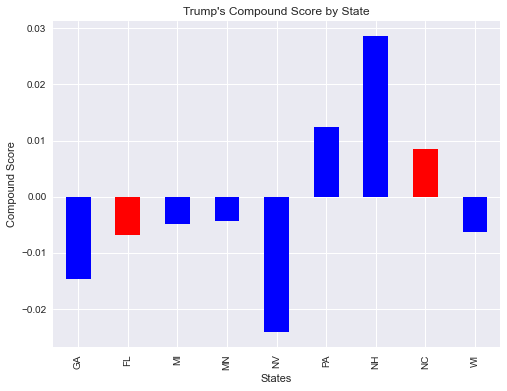

In [ ]:
all_compound = pd.Series(data=[georgia_df['compound'].mean(),florida_df['compound'].mean(),
                            michigan_df['compound'].mean(),minnesota_df['compound'].mean(),
                            nevada_df['compound'].mean(),penn_df['compound'].mean(),
                            newhamp_df['compound'].mean(),northcarolina_df['compound'].mean(),
                            wisconsin_df['compound'].mean()],
    index = ['GA','FL','MI','MN','NV','PA','NH','NC','WI'])


all_compound.plot.bar(title="Trump's Compound Score by State",
                      color=['blue','red','blue','blue','blue','blue','blue','red','blue'],
                     figsize=(8,6))
plt.ylabel('Compound Score')
plt.xlabel('States')

Here we can see a  bar plot of the compound scores by state. The states marked in blue are states that the Democratic party won and the states marked in red are the states that Trump and the Republican party won.

### Positive and Negative Sentiment Scores

Text(0, 0.5, 'Sentiment Score')

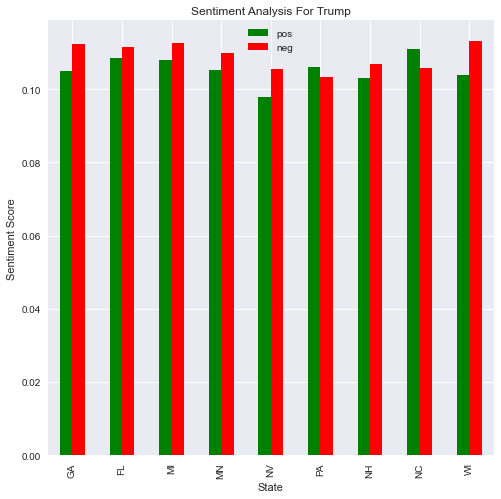

In [ ]:
all_scores = pd.DataFrame(data={
    'pos':[georgia_df['pos'].mean(),florida_df['pos'].mean(),
                            michigan_df['pos'].mean(),minnesota_df['pos'].mean(),
                            nevada_df['pos'].mean(),penn_df['pos'].mean(),
                            newhamp_df['pos'].mean(),northcarolina_df['pos'].mean(),
                            wisconsin_df['pos'].mean()],
    
    
    'neg':[georgia_df['neg'].mean(),florida_df['neg'].mean(),
                            michigan_df['neg'].mean(),minnesota_df['neg'].mean(),
                            nevada_df['neg'].mean(),penn_df['neg'].mean(),
                            newhamp_df['neg'].mean(),northcarolina_df['neg'].mean(),
                            wisconsin_df['neg'].mean()]},
                          index= ['GA','FL','MI','MN','NV','PA','NH','NC','WI']
                        )

all_scores.plot.bar(title='Sentiment Analysis For Trump',figsize=(8,8),color=['green','red'])
plt.xlabel('State')
plt.ylabel('Sentiment Score')

Again the red is representative of positive sentiments for Trump (Republican Color) and the blue is negative sentiments for Trump (Democrat Color).

Overall, It's hard to tell whether a sentiment analysis of tweets from these swing states are a good predictor for the margin of victory/defeat for Trump just by looking at the descriptive statistics for the compound, positive, and negative scores. We're going to have to compare this to a response variable, which as mentioned throughout, is going to the margin of victory or defeat for Trump.

In [ ]:
all_scores['size'] = [len(georgia_df),len(florida_df),len(michigan_df),len(minnesota_df),len(nevada_df),len(penn_df),len(newhamp_df),
                     len(northcarolina_df), len(wisconsin_df)] 

In [ ]:
all_scores

,pos,neg,size
GA,0.104969,0.112282,1789
FL,0.108501,0.111407,4155
MI,0.107834,0.112584,1894
MN,0.105341,0.110013,866
NV,0.097824,0.105566,664
PA,0.106157,0.103247,2263
NH,0.103062,0.106809,225
NC,0.110876,0.105724,1570
WI,0.103971,0.113155,806


# Margin of Victory/Defeat

Let's take a look at the margins of the votes in the 2020 election for Trump. A negative value would mean he lost by that much percentage points, and a positive value would mean he won by that much percentage points.

The margins were as follows:

- GA = -0.0026
- FL = +0.0335
- MI = -0.0278
- MN = -0.0713
- NV = -0.0239
- PA = -0.0118
- NH = -0.0737
- NC = +0.0135
- WI = -0.0063

In [ ]:
margins = {
    'GA': -0.0026,
    'FL': 0.0335,
    'MI': -0.0278,
    'MN': -0.0713,
    'NV': -0.0239,
    'PA': -0.0118,
    'NH': -0.0737,
    'NC': 0.0135,
    'WI':-0.0063
}

Here is a horizontal bar plot of the margins. Red bars indicate Republican (Trump) victory while blue bars represent Democrat (Biden) victory.

Text(0.5, 0, 'Percentage Point Margins')

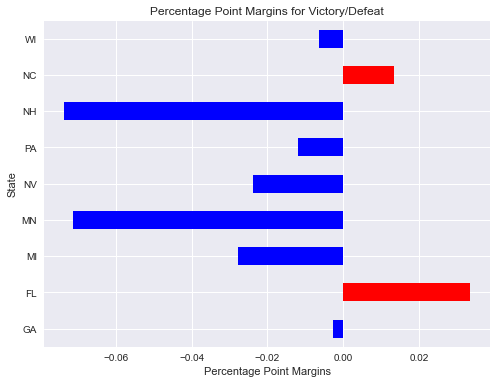

In [ ]:
margins_series = pd.Series(margins)

margins_series.plot.barh(figsize=(8,6),title='Percentage Point Margins for Victory/Defeat',color=['blue','red','blue','blue','blue','blue','blue','red','blue'])
plt.ylabel('State')
plt.xlabel('Percentage Point Margins')

# Regression: Margins vs. Sentiment

We're going to run a regression of the margins of victory as the response variable against our compound scores from the sentiment analysis to see if there is relationship between the two. This might not be too intuitive because we only have a total of 9 data points we are running the regression on. This is very little. What might be more intuitive is looking at the correlation of the two. Let's look at both.

In [ ]:
import statsmodels.formula.api as smf

We start by creating a dataframe of the compound scores and margins

In [ ]:
swing_states = pd.DataFrame(data={
    'compound': [georgia_df['compound'].mean(),florida_df['compound'].mean(),
                            michigan_df['compound'].mean(),minnesota_df['compound'].mean(),
                            nevada_df['compound'].mean(),penn_df['compound'].mean(),
                            newhamp_df['compound'].mean(),northcarolina_df['compound'].mean(),
                            wisconsin_df['compound'].mean()],
    
    'margins': [-0.0026,0.0335,-0.0278,-0.0713,-0.0239,-0.0118,-0.0737,0.0135,-0.0063],

    'size': [len(georgia_df),len(florida_df),len(michigan_df),len(minnesota_df),len(nevada_df),len(penn_df),len(newhamp_df),
                len(northcarolina_df), len(wisconsin_df)]},
                            
                            index=['GA','FL','MI','MN','NV','PA','NH','NC','WI'])

swing_states

,compound,margins,size
GA,-0.014640,-0.0026,1789
FL,-0.006782,0.0335,4155
MI,-0.004915,-0.0278,1894
MN,-0.004345,-0.0713,866
NV,-0.024180,-0.0239,664
PA,0.012418,-0.0118,2263
NH,0.028648,-0.0737,225
NC,0.008456,0.0135,1570
WI,-0.006378,-0.0063,806


Let's first look at the correlation between the two variables. 

In [ ]:
swing_states[['margins','compound']].corr()

,margins,compound
margins,1.000000,-0.334551
compound,-0.334551,1.000000


Our table shows a negative correlation between the compound score and the margin of victory. The results are saying that as compound score or sentiment move in opposite directions to the margin of victory. Intuitively this makes sense. We expected these two variables to move in opposite directions. As sentiment towards a candidate increases, its expected that the state is more likely to vote for that candidate decreasing the margins whether its of victory or defeat. The margin value will most likely approach 0, meaning the margin is decreasing.  

## Here's the regression

In [ ]:
reg = smf.ols('margins ~ compound', data=swing_states).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                margins   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8822
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.379
Time:                        13:54:13   Log-Likelihood:                 18.319
No. Observations:                   9   AIC:                            -32.64
Df Residuals:                       7   BIC:                            -32.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0199      0.012     -1.661      0.1

C:\Users\16789\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We get a R-squared value of 11.2%, which indicates that our predictor (compound score) explains about 11% of the variability in the response variable (margins). We think this is pretty good given the context, however we don't thinks it's the best representation of the model we are trying to depict, given that we have a small quantity of data points compared to the populations of these swing states.

In [ ]:
reg.params

Intercept   -0.019923
compound    -0.760341
dtype: float64

Here given our compound score equals zero, Trump lost by a margin of -0.02 percent on average and a increase of 1 in compound score is associated with a decrease in the margins by about -0.76. We're getting the same intuition from the coefficient as we did when we looked at the correlation table.


In [ ]:
swing_states['yhat'] = reg.predict()
swing_states=swing_states.reset_index()
swing_states

,index,compound,margins,size,yhat
0,GA,-0.014640,-0.0026,1789,-0.008792
1,FL,-0.006782,0.0335,4155,-0.014767
2,MI,-0.004915,-0.0278,1894,-0.016186
3,MN,-0.004345,-0.0713,866,-0.016620
4,NV,-0.024180,-0.0239,664,-0.001538
5,PA,0.012418,-0.0118,2263,-0.029365
6,NH,0.028648,-0.0737,225,-0.041705
7,NC,0.008456,0.0135,1570,-0.026353
8,WI,-0.006378,-0.0063,806,-0.015074


Here is our graph

In [ ]:
color_dict = dict({'GA':'blue',
                  'FL':'red',
                  'MI': 'blue',
                  'MN': 'blue',
                   'NV': 'blue',
                  'PA':'blue',
                  'NH':'blue',
                  'NC':'red',
                  'WI':'blue'})

Text(0.5, 1.0, 'Compound Score vs Margins of Victory')

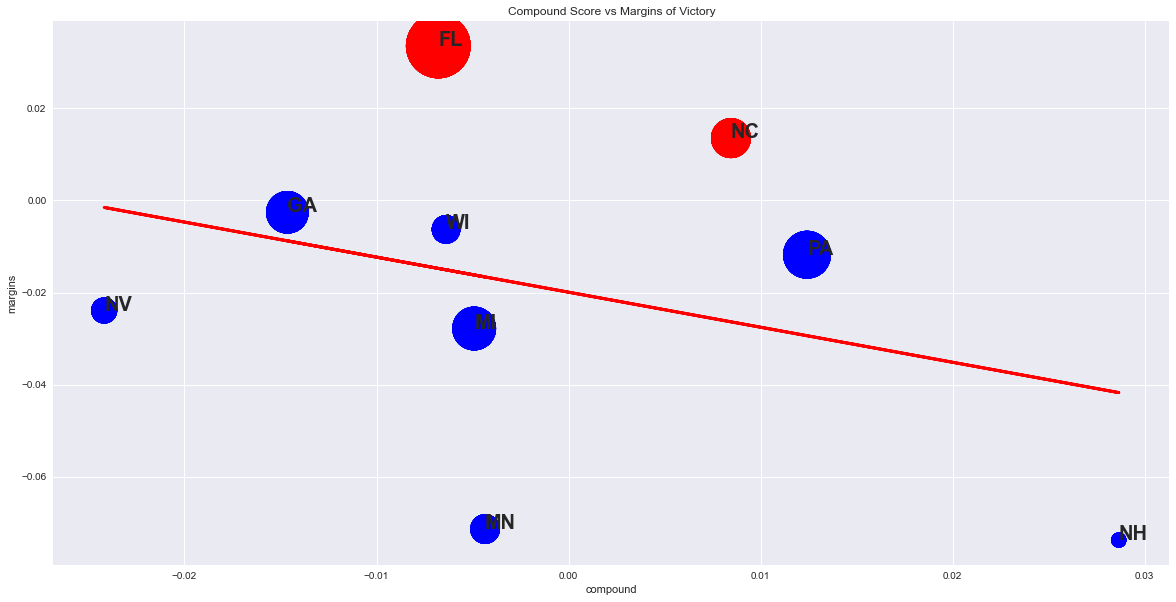

In [ ]:
fig, ax = plt.subplots()
for key, row in swing_states.iterrows(): 
    swing_states.plot.scatter(x='compound',y='margins', figsize=(20,10),ax=ax, s=swing_states['size'], color=list(color_dict.values()))
    #use the annotate method to label each point with the appropriate job category
    ax.annotate(row['index'], xy=(row['compound'], row['margins']),fontsize=20,fontweight='bold')
swing_states.set_index('compound')['yhat'].plot(ax=ax, color='r',lw=3)
ax.set_title('Compound Score vs Margins of Victory')

This is the graph with the data size for each state factored in. We can big differences in size between some states such as Florida and New Hampshire. The results are counterintuitive. We see that a higher compound score is actually associated with defeat by bigger margins. If our intuitions held true with our results, we would see a positive relationship between the two, with higher compound scores being associated with margins into the positive values, indicating a victory. We need to understand however, that we can see differing sizes of data samples in each state. This tell us that the model above may not be the model represented by the total population data of sentiment across that state. 

# Conclusion

These results are not conclusive and may not represent the true population data. In terms of the results, We observe a pattern that goes against our intuition. We saw that the two variables were negatively correlated. This could be hinting at the fact that as sentiment towards a candidate becomes positive, the margin is likely to move in a positive direction. Our data showed that they move in opposite directions, but with a negative slope. A higher compound score is associated with a defeat by bigger margins. 

We cannot conclude that doing sentiment analysis on tweets from users in a geographic area is a good predictor for predicting the outcome of the vote in that state. We also cannot conclude that it is NOT a good predictor for predicting the outcome of the vote either. If it is possible to get sample data closer to the actual population data and increase the number of data points, by including historical data also, it may be that the results align with our intuitions. A final factor to consider may be that those who tweet about Trump either positively or negatively are a vocal minority and thus may not be representative of the majority opinion in that particular state.
